Univariate Time Series With Stacked LSTM, BiLSTM, and NeuralProphet

Developing Deep learning LSTM, BiLSTM models, and NeuralProphet for multi-step forecasting of stock price

Import libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
from pylab import rcParams
from sklearn.model_selection import train_test_split as split
import warnings
import itertools
warnings.filterwarnings("ignore")
from fbprophet import Prophet
from IPython import display
from matplotlib import pyplot
import os
import re
#from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import warnings
from matplotlib.patches import Patch

This code imports several libraries and modules needed for data preprocessing, visualization, and modeling. 

First, it imports the 'numpy' library as 'np' and the 'pandas' library as 'pd', which are commonly used for numerical operations and data manipulation, respectively. 

Then, it imports the 'preprocessing' module from the 'sklearn' (scikit-learn) library, which provides various tools for data preprocessing and feature scaling. 

Next, it imports the 'train_test_split' function from the 'model_selection' module of 'sklearn', which is used to split the data into training and testing sets for model evaluation.

The code also imports the 'rcParams' module from the 'matplotlib.pylab' library, which allows customization of matplotlib's default properties and settings. 

It imports the 'datetime' module for working with date and time information. 

The 'warnings' module is imported to suppress any warning messages that may arise during the code execution. 

The 'itertools' module is imported to provide various functions for efficient iteration. 

The 'fbprophet' library is imported as 'Prophet', which is a time series forecasting library developed by Facebook. 

The 'IPython' module is imported to support interactive computing in the IPython environment. 

The 'pyplot' module is imported from the 'matplotlib' library to create visualizations. 

The 'os' module is imported to interact with the operating system, such as accessing files and directories. 

The 're' module is imported for regular expression operations. 

The 'seaborn' library is imported for statistical data visualization. 

The 'plotly.express' module is imported as 'px', which provides an easy-to-use interface for creating interactive visualizations. 

Lastly, the 'matplotlib.patches' module is imported to create custom patches for visualizations.

Overall, this code sets up the necessary libraries and modules for data analysis, preprocessing, visualization, and modeling, providing a foundation for subsequent operations on data.

Load data + Preprocess + Feature Transformation

In [ ]:
data = pd.read_csv('AAPL.csv')

This code reads a CSV file named 'AAPL.csv' and stores its contents in a variable called 'data'. 

The 'pd' prefix indicates that the 'read_csv' function is being called from the 'pandas' library. 

CSV stands for Comma-Separated Values, and it is a popular file format used to store tabular data. 

By calling the 'read_csv' function, the code reads the contents of the CSV file and creates a pandas DataFrame, which is a two-dimensional tabular data structure. 

The DataFrame is then assigned to the variable 'data', allowing further manipulation and analysis of the data stored in the CSV file. 

Overall, this line of code retrieves the data from the specified CSV file and prepares it for subsequent data processing tasks.

In [ ]:
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])

This code removes certain columns from a DataFrame named 'data' and assigns the modified DataFrame to a new variable called 'data_feature_selected'.

The 'drop' method is called on the 'data' DataFrame to eliminate specific columns. The 'axis=1' parameter indicates that the columns are being dropped, while 'labels=['Open','High','Low','Close','Volume']' specifies the names of the columns to be removed.

In this case, the columns 'Open', 'High', 'Low', 'Close', and 'Volume' are dropped from the DataFrame. These columns likely contain information related to stock market data such as the opening and closing prices and trading volume.

By removing these columns, the resulting 'data_feature_selected' DataFrame will only retain the remaining columns, potentially representing other features or attributes of the data.

This code is useful when you want to focus on specific features of the data and exclude irrelevant or redundant columns for further analysis or modeling.

In [ ]:
col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

This code reorders the columns of the 'data_feature_selected' DataFrame to have 'Date' as the first column and 'Adj Close' as the second column.

The variable 'col_order' contains a list of column names in the desired order: 'Date' and 'Adj Close'.

The 'reindex' method is called on the 'data_feature_selected' DataFrame, specifying the 'columns' parameter as 'col_order'. This reindexing operation adjusts the DataFrame to match the specified column order.

As a result, the 'data_feature_selected' DataFrame is modified to have 'Date' as the first column and 'Adj Close' as the second column, while the remaining columns, if any, maintain their original order.

Reordering the columns can be useful for visualizing or analyzing the data in a specific arrangement, especially when certain columns are of particular interest or significance.

The code concludes by displaying the modified 'data_feature_selected' DataFrame, reflecting the column reordering performed.

In [ ]:
data_feature_selected['differenced_trasnformation_demand'] = data_feature_selected['Adj Close'].diff().values
data_feature_selected.head()

This code calculates the difference between consecutive values in the 'Adj Close' column of the 'data_feature_selected' DataFrame and assigns the resulting differences to a new column called 'differenced_transformation_demand'.

The '.diff()' method is called on the 'Adj Close' column, which computes the difference between each element and its preceding element. This operation effectively calculates the change or the rate of change between consecutive values.

The '.values' attribute is used to extract the resulting differences as a NumPy array, which is then assigned to the 'differenced_transformation_demand' column of the 'data_feature_selected' DataFrame.

By performing this differencing transformation, we obtain a new column that represents the change in demand or value for each consecutive pair of observations in the 'Adj Close' column.

The 'head()' method is called on the 'data_feature_selected' DataFrame to display the first few rows, allowing us to inspect the newly added 'differenced_transformation_demand' column along with the existing columns.

This differencing operation is often applied in time series analysis to convert a series with temporal dependence into a stationary series, making it suitable for further analysis and modeling.

In [ ]:
data_feature_selected['differenced_demand_filled'] = np.where(pd.isnull(data_feature_selected['differenced_trasnformation_demand']), data_feature_selected['Adj Close'], data_feature_selected['differenced_trasnformation_demand'])
data_feature_selected.head()

This code fills missing values in the 'differenced_transformation_demand' column of the 'data_feature_selected' DataFrame by replacing them with values from the 'Adj Close' column.

The 'np.where()' function is used to apply a conditional assignment to each element of the 'differenced_transformation_demand' column. The condition being checked is whether a value is null (missing) or not.

If a value in the 'differenced_transformation_demand' column is null, the corresponding element in the 'differenced_demand_filled' column is set to the value from the 'Adj Close' column at the same position.

On the other hand, if a value in the 'differenced_transformation_demand' column is not null, meaning it already has a valid value, that value is retained in the 'differenced_demand_filled' column.

This process effectively replaces missing values in the 'differenced_transformation_demand' column with the corresponding values from the 'Adj Close' column, ensuring that no null values remain in the dataset.

The 'head()' method is then used to display the first few rows of the 'data_feature_selected' DataFrame, allowing us to examine the modified 'differenced_demand_filled' column and its values.

In [ ]:
data_feature_selected['differenced_inv_transformation_demand'] = data_feature_selected['differenced_demand_filled'].cumsum()
np.testing.assert_array_equal(data_feature_selected['Adj Close'].values, data_feature_selected['differenced_inv_transformation_demand'].values)

This code performs an inverse transformation on the 'differenced_demand_filled' column of the 'data_feature_selected' DataFrame to obtain a cumulative sum of the values.

The 'cumsum()' method is called on the 'differenced_demand_filled' column, which calculates the cumulative sum of each value in the column. This means that each value in the resulting 'differenced_inv_transformation_demand' column represents the sum of all preceding values, including itself.

By applying the inverse transformation, we obtain a new column that represents the accumulated values, effectively reversing the differencing operation previously applied.

The 'np.testing.assert_array_equal()' function is used to perform an assertion test, comparing the values of the 'Adj Close' column with the values of the 'differenced_inv_transformation_demand' column.

This assertion test checks whether the two sets of values are equal. If the test passes without raising an exception, it indicates that the inverse transformation was successful, and the values in the 'differenced_inv_transformation_demand' column match the original 'Adj Close' values.

By performing this test, we can verify the accuracy of the inverse transformation and ensure that the cumulative sum operation restores the original data.

Overall, this code applies an inverse transformation to the differenced data, computes the cumulative sum, and then verifies its correctness by comparing it with the original data.

In [ ]:
data_feature_selected.head()

This code displays the first few rows of the 'data_feature_selected' DataFrame.

The 'head()' method is called on the 'data_feature_selected' DataFrame to retrieve the top rows of the DataFrame. By default, it returns the first five rows.

Displaying the head of the DataFrame allows us to examine the structure and contents of the DataFrame, providing a glimpse of the data and its columns.

This is particularly useful when working with large datasets, as it provides a quick overview and helps in understanding the data's format, column names, and values.

By inspecting the head of the DataFrame, we can get a sense of the data's structure and make initial observations about its contents.

# plot

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


This code imports several libraries and sets up the environment for data analysis, visualization, and statistical modeling.

The 'import' statements bring in the necessary libraries into the code. 

'pandas' is imported as 'pd' and is commonly used for data manipulation and analysis. 

'numpy' is imported as 'np' and provides numerical computing capabilities. 

'statsmodels.api' is imported as 'sm' and offers statistical modeling tools and functions. 

'statsmodels.formula.api' is imported as 'smf' and provides a higher-level interface for specifying statistical models using formulas. 

'sklearn.metrics' is imported as 'metrics' and contains various metrics for evaluating model performance. 

'seaborn' is imported as 'sns' and is a data visualization library based on matplotlib, providing additional functionalities. 

'matplotlib.pyplot' is imported as 'plt' and is a plotting library for creating visualizations.

The '%matplotlib inline' magic command is used to display matplotlib plots directly in the Jupyter Notebook or similar environments.

Overall, this code sets up the necessary libraries and configurations for subsequent data analysis, modeling, and visualization tasks.

In [4]:
FIGURE_SIZE = (20, 10)
plt.rcParams['axes.grid'] = True

%matplotlib inline


This code sets the size of the figure for matplotlib plots to be 20 inches wide and 10 inches tall using the 'FIGURE_SIZE' variable.

The 'plt.rcParams' statement modifies the default configuration of matplotlib to enable the display of gridlines on the axes of plots. This will add gridlines to future plots created using matplotlib.

The '%matplotlib inline' magic command is used to configure the notebook environment to display matplotlib plots directly within the notebook interface. This allows the plots to be rendered and shown inline with the code cells.

Overall, this code sets the figure size, enables gridlines, and configures the notebook environment to display matplotlib plots inline, ensuring consistent plot appearance and convenient visualization within the notebook environment.

In [ ]:
data.set_index('Date')['Close'].plot(figsize=FIGURE_SIZE)

This code generates a line plot of the 'Close' values from the 'data' DataFrame, with the 'Date' column set as the index.

The 'set_index' method is called on the 'data' DataFrame, specifying the 'Date' column as the index. This operation rearranges the DataFrame so that the 'Date' column becomes the index, allowing for easy access and manipulation of the data based on dates.

The ['Close'] indexing is then applied to the DataFrame, selecting only the 'Close' column for plotting. This column likely contains the closing prices of a stock or some other financial instrument.

The 'plot' method is called on the selected 'Close' column to create a line plot of the data. The 'figsize' parameter is set to the value of the 'FIGURE_SIZE' variable, which determines the width and height of the resulting plot.

By executing this code, a line plot of the 'Close' values is displayed, where the x-axis represents the dates and the y-axis represents the corresponding closing prices. This visualization helps to analyze the trend and patterns in the closing prices over time.

In [ ]:
data_feature_selected.set_index('Date')['Adj Close'].plot(figsize=FIGURE_SIZE)

This code generates a line plot of the 'Adj Close' values from the 'data_feature_selected' DataFrame, with the 'Date' column set as the index.

The 'set_index' method is called on the 'data_feature_selected' DataFrame, specifying the 'Date' column as the index. This rearranges the DataFrame so that the 'Date' column becomes the index, allowing for easy access and manipulation of the data based on dates.

The ['Adj Close'] indexing is then applied to the DataFrame, selecting only the 'Adj Close' column for plotting. This column likely represents the adjusted closing prices of a stock or some other financial instrument.

The 'plot' method is called on the selected 'Adj Close' column to create a line plot of the data. The 'figsize' parameter is set to the value of the 'FIGURE_SIZE' variable, determining the width and height of the resulting plot.

Executing this code displays a line plot where the x-axis represents the dates and the y-axis represents the corresponding adjusted closing prices. This visualization helps in analyzing the trend and patterns in the adjusted closing prices over time, allowing for insights into the performance and fluctuations of the financial instrument.

# Trasnformation 

In [ ]:
data_feature_selected.set_index('Date')['differenced_trasnformation_demand'].plot(figsize=FIGURE_SIZE)

This code generates a line plot of the 'differenced_transformation_demand' values from the 'data_feature_selected' DataFrame, with the 'Date' column set as the index.

The 'set_index' method is called on the 'data_feature_selected' DataFrame, specifying the 'Date' column as the index. This rearranges the DataFrame so that the 'Date' column becomes the index, facilitating easy access and manipulation of the data based on dates.

The ['differenced_transformation_demand'] indexing is then applied to the DataFrame, selecting only the 'differenced_transformation_demand' column for plotting. This column likely contains the differenced values or the rate of change of some demand-related variable.

The 'plot' method is called on the selected 'differenced_transformation_demand' column to create a line plot of the data. The 'figsize' parameter is set to the value of the 'FIGURE_SIZE' variable, determining the width and height of the resulting plot.

By executing this code, a line plot is displayed where the x-axis represents the dates and the y-axis represents the corresponding differenced values of the demand-related variable. This visualization helps in examining the patterns and fluctuations in the rate of change of the demand variable over time, aiding in the analysis of demand dynamics or trends.

In [ ]:
data_feature_selected.set_index('Date')['differenced_demand_filled'].plot(figsize=FIGURE_SIZE)

This code generates a line plot of the 'differenced_demand_filled' values from the 'data_feature_selected' DataFrame, with the 'Date' column set as the index.

The 'set_index' method is called on the 'data_feature_selected' DataFrame, specifying the 'Date' column as the index. This reorganizes the DataFrame so that the 'Date' column becomes the index, allowing for easy access and manipulation of the data based on dates.

The ['differenced_demand_filled'] indexing is then applied to the DataFrame, selecting only the 'differenced_demand_filled' column for plotting. This column likely represents the differenced or transformed values of a demand-related variable, where any missing values have been filled in.

The 'plot' method is called on the selected 'differenced_demand_filled' column to create a line plot of the data. The 'figsize' parameter is set to the value of the 'FIGURE_SIZE' variable, determining the width and height of the resulting plot.

By executing this code, a line plot is displayed where the x-axis represents the dates and the y-axis represents the corresponding filled and transformed values of the demand-related variable. This visualization helps in analyzing the patterns and changes in the demand variable over time, after performing the differencing operation and filling in missing values.

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
data_feature_selected['differenced_trasnformation_demand'][1:].plot(c='grey')
data_feature_selected['differenced_trasnformation_demand'][1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
data_feature_selected['differenced_trasnformation_demand'][1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

This code creates a plot with multiple lines to visualize different aspects of the 'differenced_transformation_demand' values from the 'data_feature_selected' DataFrame.

The 'plt.subplots' function is called to create a figure and axes object for the plot, with a specified figsize of 20 inches wide and 10 inches tall. The resulting figure and axes objects are assigned to the variables 'fig' and 'ax', respectively.

The first line plot is created using 'data_feature_selected['differenced_transformation_demand'][1:].plot(c='grey')'. It plots the 'differenced_transformation_demand' values, starting from the second element (index 1) to the end of the column, with the line color set to grey.

The second line plot is created using 'data_feature_selected['differenced_transformation_demand'][1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')'. It plots the rolling mean of the 'differenced_transformation_demand' values, calculated using a window size of 20, with the line color set to orange.

The third line plot is created using 'data_feature_selected['differenced_transformation_demand'][1:].rolling(20).std().plot(label='Rolling STD',c='yellow')'. It plots the rolling standard deviation of the 'differenced_transformation_demand' values, also calculated using a window size of 20, with the line color set to yellow.

Finally, the 'plt.legend' function is called to add a legend to the plot, with labels for the different lines. The 'prop' argument is used to specify the font size of the legend.

By executing this code, a plot is displayed with multiple lines representing the original 'differenced_transformation_demand' values, the rolling mean, and the rolling standard deviation. This visualization helps in understanding the trends, variations, and patterns in the differenced data, and how they relate to the rolling statistics.

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
data_feature_selected['differenced_demand_filled'][1:].plot(c='grey')
data_feature_selected['differenced_demand_filled'][1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
data_feature_selected['differenced_demand_filled'][1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

This code creates a plot with multiple lines to visualize different aspects of the 'differenced_demand_filled' values from the 'data_feature_selected' DataFrame.

The 'plt.subplots' function is called to create a figure and axes object for the plot, with a specified figsize of 20 inches wide and 10 inches tall. The resulting figure and axes objects are assigned to the variables 'fig' and 'ax', respectively.

The first line plot is created using 'data_feature_selected['differenced_demand_filled'][1:].plot(c='grey')'. It plots the 'differenced_demand_filled' values, starting from the second element (index 1) to the end of the column, with the line color set to grey.

The second line plot is created using 'data_feature_selected['differenced_demand_filled'][1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')'. It plots the rolling mean of the 'differenced_demand_filled' values, calculated using a window size of 20, with the line color set to orange.

The third line plot is created using 'data_feature_selected['differenced_demand_filled'][1:].rolling(20).std().plot(label='Rolling STD',c='yellow')'. It plots the rolling standard deviation of the 'differenced_demand_filled' values, also calculated using a window size of 20, with the line color set to yellow.

Finally, the 'plt.legend' function is called to add a legend to the plot, with labels for the different lines. The 'prop' argument is used to specify the font size of the legend.

By executing this code, a plot is displayed with multiple lines representing the original 'differenced_demand_filled' values, the rolling mean, and the rolling standard deviation. This visualization helps in understanding the trends, variations, and patterns in the differenced data, and how they relate to the rolling statistics.

Exporting data to use later as stock.csv

KPSS test , to check stationary

In [ ]:

# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(data_feature_selected['differenced_demand_filled'])

This code performs the KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test to assess the stationarity of a time series.

The function 'kpss_test' is defined to take a series (in this case, the 'differenced_demand_filled' column from the 'data_feature_selected' DataFrame) as input.

Inside the function, the 'kpss' function from the 'statsmodels.tsa.stattools' module is called, passing the series as an argument. This computes the KPSS test and returns various test statistics, including the KPSS statistic, p-value, number of lags, and critical values.

The computed test statistics and values are then printed to the console, providing information about the stationarity of the series. This includes the KPSS statistic itself, the p-value, the number of lags used in the test, and the critical values at different significance levels.

Finally, based on the p-value, a conclusion is made about the stationarity of the series. If the p-value is less than 0.05 (a commonly used significance level), it is printed that "The series is not stationary." Otherwise, it is printed that "The series is stationary."

By executing this code, the KPSS test is performed on the 'differenced_demand_filled' series, providing insights into its stationarity properties.

In [ ]:
def build_temporal_features(data: pd.DataFrame) -> pd.DataFrame:
    # Temporal features
    data_feature_selected['date'] = pd.to_datetime(data['Date'])
    data_feature_selected['year'] = data_feature_selected['Date'].dt.year
    data_feature_selected['month'] = data_feature_selected['Date'].dt.month
    data_feature_selected['week'] = data_feature_selected['Date'].dt.week
    data_feature_selected['day'] = data_feature_selected['Date'].dt.day
    data_feature_selected['dayofweek'] = data_feature_selected['Date'].dt.dayofweek
    #data['quarter'] = data['date'].dt.quarter
    data_feature_selected['week_of_month'] = data['day'].apply(lambda x: np.ceil(x / 7)).astype(np.int8)
    data_feature_selected['is_weekend'] = (data_feature_selected['dayofweek'] > 5).astype(np.int8)
    
    return data_feature_selected

This code defines a function called 'build_temporal_features' that takes a DataFrame 'data' as input and returns a modified DataFrame with additional temporal features.

Inside the function, several new columns are added to the 'data_feature_selected' DataFrame, which is presumably a subset of the 'data' DataFrame.

The 'date' column is created by converting the 'Date' column of the 'data' DataFrame to a datetime format using 'pd.to_datetime()'. This allows for easier manipulation and extraction of temporal information.

Additional columns are then created based on the 'date' column using the '.dt' accessor, which provides access to various datetime properties such as year, month, week, day, and day of the week. These properties are extracted and assigned to the respective new columns in the 'data_feature_selected' DataFrame.

The 'week_of_month' column is calculated by dividing the 'day' column by 7, rounding up the result using 'np.ceil()', and converting the values to integers. This column represents the week number within a month.

The 'is_weekend' column is created by checking if the 'dayofweek' column is greater than 5 (Saturday and Sunday), and converting the resulting boolean values to integers (0 for False, 1 for True).

Finally, the modified 'data_feature_selected' DataFrame is returned as the output of the function.

By executing this code, the 'build_temporal_features' function can be used to enhance the original DataFrame with additional temporal features derived from the 'Date' column. These features can be useful for time-based analysis, modeling, and further exploration of the data.

In [ ]:
df1 = build_temporal_features(data_feature_selected)
df1.head()

This code applies the 'build_temporal_features' function to the 'data_feature_selected' DataFrame and assigns the modified DataFrame to a new variable called 'df1'. 

The 'build_temporal_features' function takes the 'data_feature_selected' DataFrame as input and adds additional temporal features to it. These features include columns representing the date, year, month, week, day, day of the week, week of the month, and whether a day is a weekend or not.

By executing this code, the 'data_feature_selected' DataFrame is passed to the 'build_temporal_features' function, which adds the new temporal columns and returns the modified DataFrame. The modified DataFrame is then assigned to the 'df1' variable.

The 'df1.head()' statement is then used to display the first few rows of the 'df1' DataFrame, allowing us to inspect the changes made by the 'build_temporal_features' function and verify the presence of the newly added temporal features.

Overall, this code applies the 'build_temporal_features' function to enhance the 'data_feature_selected' DataFrame with additional temporal information, resulting in the 'df1' DataFrame that can be used for further analysis or modeling.

In [ ]:
df1[df1.is_weekend == 1]

This code filters the DataFrame 'df1' to only include rows where the value in the 'is_weekend' column is equal to 1.

The expression 'df1.is_weekend == 1' creates a boolean mask by comparing each element in the 'is_weekend' column of 'df1' with the value 1. This results in a Series of boolean values, where True represents rows where 'is_weekend' is 1, and False represents rows where 'is_weekend' is not 1.

By indexing 'df1' with this boolean mask, such as 'df1[df1.is_weekend == 1]', the code selects only the rows where the condition is True, effectively filtering the DataFrame to include only the rows where 'is_weekend' is equal to 1.

The result is a new DataFrame that contains a subset of the original data, including only the rows where the 'is_weekend' column has a value of 1.

By executing this code, you can obtain a DataFrame that specifically focuses on weekends based on the 'is_weekend' column, which can be useful for conducting analysis or performing further operations specifically on weekend data points.

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.distplot(df1['differenced_demand_filled']).set_title("Distribution Plot Adj Close diff -AAPL")
#ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

This code creates a figure and generates a distribution plot of the 'differenced_demand_filled' column from the 'df1' DataFrame.

The 'plt.figure' function is called to create a figure object with a specified figsize of 10 inches wide and 8 inches tall. The resulting figure object is assigned to the variable 'fig'.

The 'sns.distplot' function is then called to create a distribution plot of the 'differenced_demand_filled' column. This plot displays the distribution of values in the column, showing the frequency or density of different values. The resulting plot is displayed within the created figure.

The 'set_title' method is used to set the title of the distribution plot as "Distribution Plot Adj Close diff -AAPL".

The 'plt.xticks' and 'plt.yticks' functions are called to adjust the font size of the x-axis and y-axis tick labels, respectively, making them larger and more readable.

By executing this code, a figure is created, and a distribution plot of the 'differenced_demand_filled' column is displayed within the figure. This plot provides insights into the distribution and characteristics of the differenced demand values, aiding in the analysis and understanding of their statistical properties.

Save old data after transformation  and load 

In [5]:
df1 = pd.read_csv('stock.csv')

This code reads the contents of a CSV file named 'stock.csv' and stores it in a DataFrame called 'df1'.

The 'pd.read_csv' function is called, where 'pd' refers to the pandas library. This function is used to read data from a CSV file and create a DataFrame.

By specifying the file name 'stock.csv' as the input to the 'read_csv' function, the code reads the contents of the CSV file and creates a DataFrame object.

The resulting DataFrame, 'df1', contains the data from the CSV file, where each row represents a data entry and each column represents a variable or attribute.

By executing this code, the data from the 'stock.csv' file is loaded into the 'df1' DataFrame, enabling further analysis, manipulation, and exploration of the data within the Python environment.

In [6]:
df1

Date   Adj Close  ...  week_of_month  is_weekend
0     2010-01-04    6.562589  ...              1           0
1     2010-01-05    6.573936  ...              1           0
2     2010-01-06    6.469368  ...              1           0
3     2010-01-07    6.457407  ...              1           0
4     2010-01-08    6.500340  ...              2           0
...          ...         ...  ...            ...         ...
2975  2021-10-27  148.850006  ...              4           0
2976  2021-10-28  152.570007  ...              4           0
2977  2021-10-29  149.800003  ...              5           0
2978  2021-11-01  148.960007  ...              1           0
2979  2021-11-02  150.580002  ...              1           0

[2980 rows x 13 columns]

The code snippet `df1` on its own does not perform any specific action. It refers to the variable `df1`, assuming it has been previously assigned a value.

The reference to `df1` can be used to access and manipulate the data stored in the DataFrame assigned to that variable. It allows for further analysis, visualization, or any other operations that can be performed on a DataFrame.

Without any additional code or context, it is not possible to determine the specific purpose or outcome of referencing `df1`. The actions performed on `df1` would depend on the preceding code or subsequent code that operates on this DataFrame.

Choose specific days with mask

In [ ]:

mask = (df1['Date'] > '2010-01-01') & (df1['Date'] <= '2021-12-31')
print(df1.loc[mask])

This code applies a mask to the 'df1' DataFrame to select rows that meet a specific condition, and then prints the selected rows.

The mask is created using a combination of two conditions. The first condition checks if the 'Date' column values are greater than '2010-01-01', and the second condition checks if the 'Date' column values are less than or equal to '2021-12-31'. 

By using the '&' operator, both conditions are combined into a single mask, which results in a boolean Series where 'True' indicates that the corresponding row meets both conditions and 'False' indicates otherwise.

The 'mask' is then passed as an indexing argument to the 'df1.loc' function, which selects only the rows that correspond to 'True' in the mask. This filters the DataFrame and returns a new DataFrame with the selected rows.

Finally, the 'print' function is used to display the selected rows of the DataFrame.

By executing this code, the rows in 'df1' that satisfy the specified date range condition are printed, allowing for the examination or analysis of the subset of data within that specific date range.

In [48]:
y = df1['Adj Close']

This code assigns the values of the 'Adj Close' column from the 'df1' DataFrame to a variable called 'y'.

The 'df1['Adj Close']' indexing expression selects the 'Adj Close' column from the DataFrame, assuming such a column exists. This column likely contains the adjusted closing prices of a stock or some other financial instrument.

By assigning this column to the variable 'y', the code creates a new object that holds the values of the 'Adj Close' column. 'y' can be used subsequently for analysis, modeling, or any other operations that require access to these specific values.

By executing this code, the 'y' variable contains the values of the 'Adj Close' column from the 'df1' DataFrame, enabling further manipulation or analysis of the data.

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
y=scaler.fit_transform(np.array(y).reshape(-1,1))

This code applies min-max scaling to the values stored in the variable 'y', using the 'MinMaxScaler' class from the 'sklearn.preprocessing' module.

The 'MinMaxScaler' class is imported, allowing for the transformation of the data to a specific range. In this case, the feature range is set to (0, 1), meaning the scaled values will be within this range.

An instance of the 'MinMaxScaler' class is created, and the feature range is specified as (0, 1) by passing it as an argument during initialization.

The 'fit_transform' method is called on the 'scaler' object to perform the scaling operation on the 'y' variable. Before applying the transformation, the 'y' variable is reshaped using 'np.array(y).reshape(-1,1)' to ensure it has a compatible shape for the scaler.

After the scaling operation, the transformed values are assigned back to the 'y' variable, overwriting the original values with the scaled values.

By executing this code, the values in 'y' are transformed using min-max scaling, ensuring that they are rescaled to a range between 0 and 1. This scaling can be useful for normalizing the data and bringing it to a consistent scale for certain types of analyses or machine learning algorithms.

In [50]:
##splitting dataset into train and test split
training_size=int(len(y)*0.65)
test_size=len(y)-training_size
train_data,test_data=y[0:training_size,:],y[training_size:len(y),:1]

This code splits the data stored in the variable 'y' into training and test datasets, based on a specified ratio.

The training dataset is created by selecting a portion of the data from the start of 'y' and assigning it to the variable 'train_data'. The size of this portion is determined by multiplying the length of 'y' by 0.65 and converting it to an integer. This ratio of 0.65 indicates that 65% of the data will be used for training.

The test dataset is created by selecting the remaining portion of the data from 'y' and assigning it to the variable 'test_data'. The size of this portion is calculated as the difference between the total length of 'y' and the length of the training dataset.

By executing this code, the data in 'y' is split into two separate datasets: 'train_data' and 'test_data'. 'train_data' contains the initial portion of 'y' representing 65% of the data, while 'test_data' contains the remaining portion representing the remaining 35% of the data. This split allows for training and evaluating models using different subsets of the data.

In [51]:
training_size,test_size

(1937, 1043)

This code calculates the sizes of the training and test datasets, which are used for model training and evaluation, respectively.

The variable 'training_size' represents the size or number of samples in the training dataset. It is determined by multiplying the length of the variable 'y' by 0.65 and converting it to an integer. This calculation determines that the training dataset will contain 65% of the data.

The variable 'test_size' represents the size or number of samples in the test dataset. It is calculated as the difference between the total length of 'y' and the length of the training dataset. This calculation determines that the test dataset will contain the remaining 35% of the data.

By executing this code, the sizes of the training and test datasets are calculated based on the specified proportions, providing information about the number of samples in each dataset. These sizes are useful for managing the data splitting process and ensuring appropriate allocation for model training and testing purposes.

In [52]:
train_data[2]

array([0.00384731])

This code retrieves a specific element from the 'train_data' dataset.

The indexing expression 'train_data[2]' is used to access the element at index 2 in the 'train_data' dataset. 

Indexing in Python starts from 0, so 'train_data[2]' refers to the third element in the 'train_data' dataset.

By executing this code, the value at index 2 in the 'train_data' dataset is retrieved and can be used or further processed as needed.

In [53]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]    
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

This code defines a function called 'create_dataset' that takes a dataset and a time step as inputs and returns two arrays: 'dataX' and 'dataY'.

Inside the function, two empty lists, 'dataX' and 'dataY', are created to store the input and output sequences, respectively.

A for loop is used to iterate through the dataset starting from index 0 up to 'len(dataset) - time_step - 1'. This loop is responsible for creating the input-output pairs based on the specified time step.

In each iteration, a sliding window approach is used to extract 'time_step' number of consecutive elements from the dataset. These elements are stored in the variable 'a'.

The 'a' sequence is then appended to the 'dataX' list, representing the input sequence for the corresponding time step.

The element at index 'i + time_step' from the dataset is extracted and appended to the 'dataY' list, representing the output or target value for the given time step.

After iterating through all the elements, the function returns the 'dataX' and 'dataY' lists as numpy arrays.

By executing this code, the 'create_dataset' function can be used to transform a dataset into input-output pairs suitable for training certain types of models, such as recurrent neural networks (RNNs) or time series forecasting models. The 'dataX' array contains the input sequences, each with 'time_step' number of elements, and the 'dataY' array contains the corresponding output values.

In [54]:
import numpy

This code imports the numpy library, which is a widely used library in Python for numerical operations and array manipulation.

By including the line 'import numpy', it makes the functions, classes, and modules provided by the numpy library available for use in the current code.

Numpy provides powerful tools for working with multi-dimensional arrays and performing various mathematical operations efficiently. It is commonly used in scientific computing, data analysis, and machine learning tasks.

By executing this code, the numpy library is imported, allowing the code to utilize its functionalities for array manipulation, mathematical computations, and other tasks that require numerical operations.

In [55]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

This code utilizes the 'create_dataset' function to create input-output pairs for training and testing datasets with a specified time step.

The variable 'time_step' is set to 100, representing the number of time steps or elements to be considered as input for each sample in the dataset.

The 'create_dataset' function is called twice. The first call with 'train_data' and 'time_step' as arguments generates the 'X_train' and 'y_train' arrays. 'X_train' contains the input sequences for the training dataset, where each sequence has 'time_step' number of elements. 'y_train' contains the corresponding output or target values for the training dataset.

The second call with 'test_data' and 'time_step' as arguments generates the 'X_test' and 'y_test' arrays. 'X_test' contains the input sequences for the testing dataset, similar to 'X_train'. 'y_test' contains the corresponding output or target values for the testing dataset.

By executing this code, the 'create_dataset' function is used to prepare the training and testing datasets by transforming them into input-output pairs with a fixed time step. This allows the data to be structured appropriately for training and evaluating models that require sequential or time-dependent data.

In [56]:
print(X_train.shape), print(y_train.shape)

(1836, 100)
(1836,)


(None, None)

This code prints the shapes of the 'X_train' and 'y_train' arrays, which represent the dimensions or sizes of these arrays.

The 'print' function is used to display the shape of an array. In this case, it is called twice: once to print the shape of 'X_train' and another time to print the shape of 'y_train'.

The '.shape' attribute returns a tuple that represents the dimensions of an array. The first element of the tuple corresponds to the number of samples or rows in the array, while the second element represents the number of features or columns.

By executing this code, the shapes of 'X_train' and 'y_train' are printed to the console. This provides information about the number of training samples and the structure of the input and output arrays, helping to verify the dimensions and ensure they align correctly for subsequent model training or analysis.

In [57]:
print(X_test.shape), print(ytest.shape)

(942, 100)
(942,)


(None, None)

This code prints the shapes of the 'X_test' and 'ytest' arrays, which represent the dimensions or sizes of these arrays.

The 'print' function is used to display the shape of an array. In this case, it is called twice: once to print the shape of 'X_test' and another time to print the shape of 'ytest'.

The '.shape' attribute returns a tuple that represents the dimensions of an array. The first element of the tuple corresponds to the number of samples or rows in the array, while the second element represents the number of features or columns.

By executing this code, the shapes of 'X_test' and 'ytest' are printed to the console. This provides information about the number of testing samples and the structure of the input and output arrays, helping to verify the dimensions and ensure they align correctly for subsequent model evaluation or analysis.

In [58]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

This code reshapes the 'X_train' and 'X_test' arrays to have an additional dimension.

The 'X_train' array is reshaped using the 'reshape' method. The new shape is specified as (X_train.shape[0], X_train.shape[1], 1), where 'X_train.shape[0]' represents the number of samples or rows, 'X_train.shape[1]' represents the number of time steps or features in each sample, and the additional dimension of size 1 is added.

Similarly, the 'X_test' array is reshaped using the 'reshape' method with the new shape specified as (X_test.shape[0], X_test.shape[1], 1), following the same logic as 'X_train'.

By executing this code, the dimensions of 'X_train' and 'X_test' are modified to include an additional dimension with a size of 1. This reshaping is often necessary for preparing the data to be compatible with certain types of models, such as recurrent neural networks (RNNs), which expect input data to have a specific shape or structure.

In [59]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout ,BatchNormalization
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.initializers import RandomNormal, Constant


This code sets up the architecture and components of a Stacked LSTM model using the TensorFlow and Keras libraries.

The 'Sequential' class is imported from 'tensorflow.keras.models' to create a sequential model, which allows building a neural network model layer by layer.

The 'Dense', 'Dropout', and 'BatchNormalization' layers are imported from 'tensorflow.keras.layers'. These layers are building blocks used to define the structure of the neural network. 'Dense' represents a fully connected layer, 'Dropout' applies regularization by randomly setting a fraction of input units to 0, and 'BatchNormalization' normalizes the inputs during training to stabilize and accelerate the learning process.

The 'LSTM' layer is also imported from 'tensorflow.keras.layers'. This layer represents a Long Short-Term Memory (LSTM) unit, which is a type of recurrent neural network (RNN) layer specifically designed for processing sequential data.

The 'MinMaxScaler' class is imported from 'sklearn.preprocessing'. This scaler can be used to normalize the input data to a specified range, which is often necessary for improving the training process and model performance.

The 'RandomNormal' and 'Constant' classes are imported from 'tensorflow.keras.initializers'. These classes provide initializers for weights and biases in the neural network layers, allowing customization of the initialization process.

By executing this code, the necessary components for creating a Stacked LSTM model are imported and made available for use. These components include the sequential model, various types of layers (Dense, Dropout, BatchNormalization, LSTM), a scaler for data normalization, and initializers for weights and biases. These components can then be used to define and build a Stacked LSTM model architecture for training and making predictions on sequential data.

Tunning LSTM

In [85]:

# # Build the LSTM Stack model
model=Sequential()
# Adding first LSTM layer
model.add(LSTM(150,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2)) # Dropout regularisation
# second LSTM layer 
model.add(LSTM(150,return_sequences=True))
# Adding third LSTM layer 
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))
# Adding fourth LSTM layer
model.add(LSTM(150))
model.add(Dropout(0.2))
# Adding the Output Layer
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')




This code defines and builds a Stacked LSTM model using the TensorFlow and Keras libraries.

The 'Sequential' class is used to create an instance of the sequential model, which allows adding layers to the model sequentially.

The model is built by adding different layers one by one using the 'add' method of the model object.

The first layer added is an LSTM layer with 150 units, specified by 'LSTM(150)'. This layer is set to return sequences, denoted by 'return_sequences=True'. The 'input_shape' parameter defines the shape of the input data, which is (100, 1) in this case, representing 100 time steps and 1 feature.

A dropout layer is added after the first LSTM layer with a dropout rate of 0.2. Dropout is a regularization technique that randomly sets a fraction of input units to 0 during training to prevent overfitting.

Next, two more LSTM layers are added, each with 150 units and set to return sequences. Dropout layers with a rate of 0.2 are added after the second and third LSTM layers as well.

Finally, an output layer with a single unit is added using the 'Dense' layer, representing the predicted value. The model is compiled using the mean squared error loss function and the Adam optimizer.

By executing this code, a Stacked LSTM model with multiple LSTM layers is built. Each LSTM layer processes the input sequences and passes the output to the next LSTM layer. Dropout layers are added to introduce regularization and reduce overfitting. The output layer provides the final prediction. The model is ready for training and can be used for sequential data forecasting or other related tasks.

In [86]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 100, 150)          91200     
                                                                 
 dropout_26 (Dropout)        (None, 100, 150)          0         
                                                                 
 lstm_33 (LSTM)              (None, 100, 150)          180600    
                                                                 
 lstm_34 (LSTM)              (None, 100, 150)          180600    
                                                                 
 dropout_27 (Dropout)        (None, 100, 150)          0         
                                                                 
 lstm_35 (LSTM)              (None, 150)               180600    
                                                                 
 dropout_28 (Dropout)        (None, 150)              

This code prints a summary of the architecture and parameters of the previously defined model.

The 'summary' method is called on the 'model' object, which was created using the 'Sequential' class from the TensorFlow and Keras libraries.

By executing this code, a summary of the model is displayed, providing a concise overview of the layers, their shapes, and the number of parameters in the model.

The summary includes information such as the layer type, the output shape of each layer, the number of parameters (weights and biases) in each layer, and the total number of trainable parameters in the model.

This summary is helpful for understanding the structure and complexity of the model, as well as checking for any unexpected layer configurations or parameter counts. It provides valuable insights into the architecture and can assist in troubleshooting or optimizing the model design.

EarlyStopping


In [88]:
from tensorflow.keras.callbacks import EarlyStopping


This code imports the 'EarlyStopping' callback from the TensorFlow and Keras libraries.

The 'EarlyStopping' callback is a technique used during the training of machine learning models to monitor a specific metric, such as the validation loss, and stop the training process early if certain criteria are met.

By importing the 'EarlyStopping' callback, it becomes available for use in the code to improve the training process and prevent overfitting.

The 'EarlyStopping' callback can be configured with parameters such as the monitored metric, the patience value (the number of epochs to wait before stopping if no improvement is observed), the mode (whether to minimize or maximize the monitored metric), and other options.

By utilizing the 'EarlyStopping' callback, it becomes possible to automatically stop the model training process based on specific conditions, such as when the validation loss stops improving or starts to degrade. This helps to prevent overfitting and optimize the training process.

In [89]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30, 
        verbose=1, mode='auto', restore_best_weights=True)

history=model.fit(X_train,y_train,validation_data=(X_test,ytest),
        callbacks=[monitor],verbose=1,epochs=1000)

Epoch 1/1000
58/58 [==============================] - 54s 772ms/step - loss: 8.8362e-04 - val_loss: 0.0067
Epoch 2/1000
58/58 [==============================] - 44s 751ms/step - loss: 9.3615e-05 - val_loss: 0.0016
Epoch 3/1000
58/58 [==============================] - 43s 744ms/step - loss: 7.9681e-05 - val_loss: 0.0037
Epoch 4/1000
58/58 [==============================] - 43s 743ms/step - loss: 7.6155e-05 - val_loss: 9.3513e-04
Epoch 5/1000
58/58 [==============================] - 43s 743ms/step - loss: 7.9132e-05 - val_loss: 0.0024
Epoch 6/1000
58/58 [==============================] - 43s 743ms/step - loss: 7.2373e-05 - val_loss: 0.0019
Epoch 7/1000
58/58 [==============================] - 43s 742ms/step - loss: 7.1526e-05 - val_loss: 8.4308e-04
Epoch 8/1000
58/58 [==============================] - 44s 755ms/step - loss: 6.1989e-05 - val_loss: 7.4183e-04
Epoch 9/1000
58/58 [==============================] - 43s 745ms/step - loss: 6.5635e-05 - val_loss: 7.0740e-04
Epoch 10/1000
58/58 [

The provided code implements and utilizes the 'EarlyStopping' callback during the training phase of the model. The 'EarlyStopping' callback is an approach employed in machine learning to monitor a specific metric, such as validation loss, and halt the training process prematurely if certain conditions are met.

In this case, the 'EarlyStopping' callback is configured with various parameters. The 'monitor' parameter is set to 'val_loss', indicating that the validation loss metric will be monitored. The 'min_delta' parameter is defined as 1e-3, specifying the minimum change in the monitored metric that will be considered as an improvement. The 'patience' parameter is set to 30, meaning that training will stop if no improvement is observed for 30 consecutive epochs. Additionally, the 'verbose' parameter is set to 1 to enable verbose output during training, providing relevant information. The 'mode' parameter is set to 'auto' so that the callback automatically determines whether the metric should be minimized or maximized. Lastly, the 'restore_best_weights' parameter is set to True, ensuring that the model's best weights are restored at the end of training.

The 'model.fit' function is used to train the model. It takes the training data, 'X_train' and 'y_train', as inputs. The validation data, 'X_test' and 'ytest', is specified using the 'validation_data' argument.

The 'callbacks' parameter is set to [monitor], indicating that the 'EarlyStopping' callback is utilized during training. This allows the model to stop training if the specified conditions for early stopping are met.

During training, the provided parameters, such as the verbosity level ('verbose=1') and the maximum number of epochs ('epochs=1000'), are used to control the training process.

By executing this code, the model is trained while continuously monitoring the validation loss. The 'EarlyStopping' callback actively checks for improvements in the validation loss, and if no significant improvement is observed for a certain number of epochs defined by the 'patience' parameter, the training process is terminated early. Moreover, the callback ensures that the best weights of the model are restored based on the performance on the validation set. This mechanism helps prevent overfitting and optimizes the training process by automatically stopping training when no further improvement is observed.

To ensure consistent results and avoid variability each time the code is executed, you can implement the following strategies:

1. Set the seed: By setting a random seed at the beginning of the code, you can ensure that the random number generation process remains the same across different runs. This can be achieved by using the `random.seed()` function, specifying a fixed value.

2. Save model weights or the entire model: After training the model, you can save the learned weights or the entire model to disk. This allows you to reload the model in subsequent runs, ensuring that you are working with the same model configuration and weights each time.

By applying these strategies, you can mitigate the impact of random initialization and potential variations in the training process, resulting in more reproducible and consistent outcomes.

In [99]:
model.save("lstm2022.h5") #save model 

This code saves the entire model, including its architecture, configuration, and learned weights, to a file named "lstm2022.h5".

The `save()` method is called on the model object, specifying the desired file name and extension. In this case, the ".h5" extension is commonly used for saving Keras models in the Hierarchical Data Format version 5 (HDF5) file format.

By executing this code, the model is saved to disk, allowing it to be loaded and reused in future sessions or for deployment in production environments. Saving the model preserves all the information necessary to reproduce and utilize the trained model, including its layers, connections, and trained parameters. This enables easy sharing, deployment, and reusability of the model without having to retrain it from scratch each time.

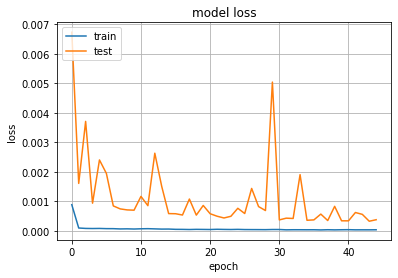

In [90]:
plt.plot(history.history['loss']) # tb
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

This code generates a plot to visualize the loss values of the model during the training process.

The `plt.plot()` function is used to create two separate lines on the plot: one for the training loss (`history.history['loss']`) and another for the validation loss (`history.history['val_loss']`). These loss values are typically recorded during the training process.

The `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` functions are used to set the title of the plot, label the y-axis as "loss", and label the x-axis as "epoch", respectively.

The `plt.legend()` function is used to add a legend to the plot, specifying the labels "train" and "test" for the respective lines. The `loc='upper left'` argument determines the position of the legend within the plot.

Finally, the `plt.show()` function is called to display the plot.

By executing this code, a plot is generated showing the training and validation loss values over the epochs of the training process. This visualization helps in understanding the model's learning progress and performance. The plot enables the identification of trends, overfitting or underfitting, and the convergence of the loss values. It provides insights into the training dynamics and can aid in making decisions regarding model optimization and hyperparameter tuning.

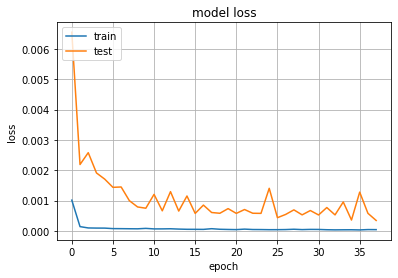

In [61]:
plt.plot(history.history['loss']) # t
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

This code generates a plot to visualize the loss values of the model during the training process.

The `plt.plot()` function is used to create two separate lines on the plot: one for the training loss and another for the validation loss. These loss values are obtained from the `history` object, which typically stores the loss values recorded during the training process.

The `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` functions are used to set the title of the plot as "model loss", label the y-axis as "loss", and label the x-axis as "epoch", respectively.

The `plt.legend()` function is used to add a legend to the plot, with labels "train" and "test" representing the training and validation loss lines, respectively. The `loc='upper left'` argument specifies the position of the legend within the plot.

Finally, the `plt.show()` function is called to display the plot.

By executing this code, a plot is generated that visualizes the training and validation loss values over the epochs of the training process. This plot helps in assessing the model's performance and learning dynamics. It allows for the comparison of the training and validation losses, enabling insights into the model's ability to generalize to unseen data. The plot aids in understanding whether the model is overfitting or underfitting, and assists in making decisions regarding model adjustments or further training iterations.

In [ ]:
plt.plot(history.history['loss']) # tn
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

This code generates a plot that visualizes the loss values of the model during the training process.

The `plt.plot()` function is used to create two separate lines on the plot: one representing the training loss and another representing the validation loss. These loss values are obtained from the `history` object, which typically stores the recorded loss values during the training process.

The `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` functions are used to set the title, y-axis label, and x-axis label of the plot, respectively. In this case, the title is set to "model loss" and the y-axis label is set to "loss".

The `plt.legend()` function is used to add a legend to the plot. It specifies the labels "train" and "test" for the training and validation loss lines, respectively. The `loc='upper left'` argument determines the position of the legend within the plot.

Finally, the `plt.show()` function is called to display the plot.

By executing this code, a plot is generated that visualizes the training and validation loss values over the epochs of the training process. This plot helps in assessing the performance and learning dynamics of the model. It allows for the comparison of the training and validation losses, providing insights into the model's ability to generalize to unseen data. The plot aids in understanding whether the model is overfitting or underfitting and assists in making decisions regarding model adjustments or further training iterations.

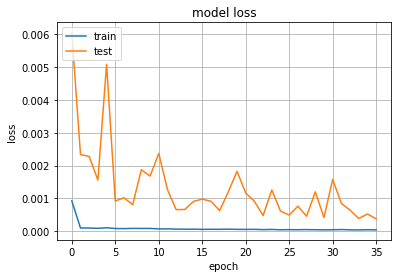

In [51]:
plt.plot(history.history['loss']) # t
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

This code generates a line plot to visualize the training and validation loss values of a model over multiple epochs.

The `plt.plot()` function is used to create two lines on the plot: one for the training loss values and another for the validation loss values. These values are retrieved from the `history` object, which typically stores the recorded loss values during the training process.

The `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` functions are used to set the title, y-axis label, and x-axis label of the plot, respectively. In this case, the title is set to "model loss" and the y-axis label is set to "loss".

The `plt.legend()` function is used to add a legend to the plot, specifying the labels "train" and "test" for the training and validation lines, respectively. The `loc='upper left'` argument determines the position of the legend within the plot.

Finally, the `plt.show()` function is called to display the plot.

By executing this code, a plot is generated that visualizes the training and validation loss values over the epochs of the training process. This plot provides insights into the model's learning progress and performance. It allows for the comparison of the training and validation losses, indicating how well the model is fitting the training data and generalizing to unseen data. The plot can be used to identify patterns, trends, overfitting, or underfitting, and to make informed decisions about model adjustments or further training iterations.

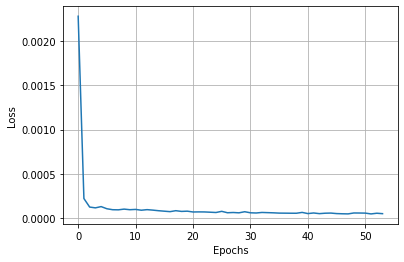

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

This code generates a line plot to visualize the loss values of a model over the epochs of the training process.

The `plt.plot()` function is used to create a line plot, where the x-axis represents the epochs and the y-axis represents the loss values. The loss values are retrieved from the `history` object, which typically stores the recorded loss values during training.

The `plt.xlabel()` and `plt.ylabel()` functions are used to set the labels for the x-axis and y-axis, respectively. In this case, the x-axis is labeled as "Epochs" and the y-axis is labeled as "Loss".

Finally, the `plt.show()` function is called to display the plot.

By executing this code, a plot is generated that visualizes the change in loss values over the epochs. This plot provides insights into the model's learning progress and performance. It allows for the examination of how the loss value decreases or converges over time, indicating the model's ability to fit the training data. Analyzing the loss plot can help identify trends, patterns, and possible issues such as overfitting or underfitting. The plot aids in making informed decisions about model adjustments, selecting the optimal number of epochs, or evaluating the training progress.

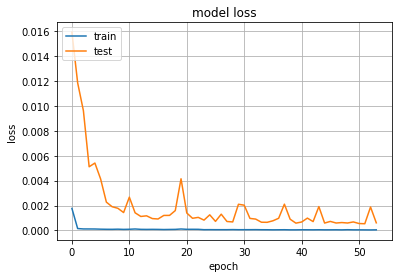

In [ ]:
plt.plot(history.history['loss']) # t
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

This code generates a line plot to visualize the training and validation loss values of a model over the epochs of the training process.

The `plt.plot()` function is used to create two lines on the plot: one representing the training loss values and another representing the validation loss values. These values are obtained from the `history` object, which typically stores the recorded loss values during the training process.

The `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` functions are used to set the title, y-axis label, and x-axis label of the plot, respectively. In this case, the title is set to "model loss" and the y-axis label is set to "loss".

The `plt.legend()` function is used to add a legend to the plot, with labels "train" and "test" representing the training and validation loss lines, respectively. The `loc='upper left'` argument specifies the position of the legend within the plot.

Finally, the `plt.show()` function is called to display the plot.

By executing this code, a plot is generated that visualizes the training and validation loss values over the epochs of the training process. This plot helps in assessing the performance and learning dynamics of the model. It allows for the comparison of the training and validation losses, providing insights into the model's ability to generalize to unseen data. The plot aids in understanding whether the model is overfitting or underfitting and assists in making decisions regarding model adjustments or further training iterations.

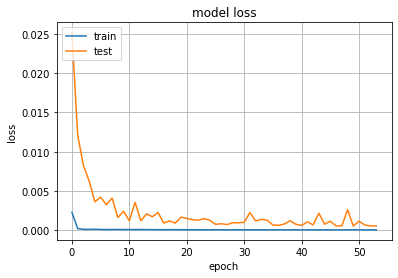

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This code generates a line plot to visualize the training and validation loss values of a model over the epochs of the training process.

The `plt.plot()` function is used to create two lines on the plot: one for the training loss values and another for the validation loss values. These loss values are retrieved from the `history` object, which typically stores the recorded loss values during the training process.

The `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` functions are used to set the title of the plot as "model loss", label the y-axis as "loss", and label the x-axis as "epoch", respectively.

The `plt.legend()` function is used to add a legend to the plot, with labels "train" and "test" representing the training and validation loss lines, respectively. The `loc='upper left'` argument determines the position of the legend within the plot.

Finally, the `plt.show()` function is called to display the plot.

By executing this code, a plot is generated that visualizes the training and validation loss values over the epochs of the training process. This plot allows for the comparison of the training and validation losses, providing insights into the model's learning progress and generalization performance. The plot helps in identifying patterns, trends, overfitting, or underfitting. It assists in making informed decisions regarding model adjustments, hyperparameter tuning, and determining the optimal number of epochs.

In [ ]:
import tensorflow as tf

This code imports the TensorFlow library, which is a popular open-source machine learning framework developed by Google.

By including this line of code, the program gains access to the various functionalities and classes provided by TensorFlow. This allows the program to utilize TensorFlow's powerful features for building and training machine learning models.

TensorFlow provides a wide range of tools and APIs for tasks such as neural network construction, optimization algorithms, GPU acceleration, distributed computing, and more. It simplifies the process of implementing and training deep learning models, making it a widely adopted framework in the field of machine learning and artificial intelligence.

Overall, importing TensorFlow at the beginning of the code signifies the intention to use TensorFlow's capabilities throughout the program.

In [91]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

This code performs predictions using the trained LSTM model on both the training and testing datasets.

The `model.predict()` function is called twice, first with the input `X_train` and then with the input `X_test`. This function takes the input data and generates predictions based on the learned weights and architecture of the LSTM model.

The predictions for the training dataset are stored in the variable `train_predict`, while the predictions for the testing dataset are stored in the variable `test_predict`.

By executing this code, the model generates predicted values for both the training and testing datasets. These predictions can be further evaluated and compared with the actual values to assess the performance of the model.

In [92]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

This code performs a transformation to convert the predicted values back to their original scale.

The `scaler.inverse_transform()` function is used to reverse the scaling transformation that was previously applied to the predicted values. This transformation is necessary because the predictions were obtained using scaled data to ensure consistency with the training process.

By applying the `scaler.inverse_transform()` function to both `train_predict` and `test_predict`, the predicted values are transformed back to their original scale. This allows for a meaningful comparison and evaluation of the predictions against the actual values, which are typically in the original scale.

Executing this code enables the predictions to be converted back to their original form, providing a more intuitive representation of the predicted values. This allows for easier interpretation and analysis of the model's performance in relation to the actual data.

In [93]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

20.75319059791041

This code calculates the root mean squared error (RMSE), which is a performance metric used to evaluate the accuracy of the model's predictions.

The `mean_squared_error()` function from the `sklearn.metrics` module is used to calculate the mean squared error (MSE) between the actual target values (`y_train`) and the predicted values (`train_predict`). The MSE represents the average squared difference between the predicted and actual values.

The `math.sqrt()` function is then applied to the MSE result to compute the square root, yielding the RMSE. The RMSE provides a measure of how closely the predicted values match the actual values, with lower values indicating better predictive performance.

By executing this code, the RMSE between the predicted values (`train_predict`) and the actual target values (`y_train`) is computed. This allows for the assessment of the model's performance in terms of the average deviation between the predicted and actual values.

In [94]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, test_predict)

80.09842461981907

This code calculates the mean absolute error (MAE), which is a performance metric used to evaluate the accuracy of the model's predictions.

The `mean_absolute_error()` function from the `sklearn.metrics` module is used to calculate the mean absolute error between the actual target values (`ytest`) and the predicted values (`test_predict`). The MAE represents the average absolute difference between the predicted and actual values.

By executing this code, the MAE between the predicted values (`test_predict`) and the actual target values (`ytest`) is computed. This allows for the assessment of the model's performance in terms of the average absolute deviation between the predicted and actual values. A lower MAE indicates better predictive performance, as it signifies a smaller average difference between the predicted and actual values.

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train, train_predict)

20.030015593076516

This code calculates the mean absolute error (MAE), which is a performance metric used to evaluate the accuracy of the model's predictions.

The `mean_absolute_error()` function from the `sklearn.metrics` module is used to calculate the mean absolute error between the actual target values (`y_train`) and the predicted values (`train_predict`). The MAE represents the average absolute difference between the predicted and actual values.

By executing this code, the MAE between the predicted values (`train_predict`) and the actual target values (`y_train`) is computed. This allows for the assessment of the model's performance in terms of the average absolute deviation between the predicted and actual values. A lower MAE indicates better predictive performance, as it signifies a smaller average difference between the predicted and actual values.

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, test_predict)

79.20435869404275

This code calculates the mean absolute error (MAE), which is a performance metric used to evaluate the accuracy of the model's predictions.

The `mean_absolute_error()` function from the `sklearn.metrics` module is used to calculate the mean absolute error between the actual target values (`ytest`) and the predicted values (`test_predict`). The MAE represents the average absolute difference between the predicted and actual values.

By executing this code, the MAE between the predicted values (`test_predict`) and the actual target values (`ytest`) is computed. This allows for the assessment of the model's performance in terms of the average absolute deviation between the predicted and actual values. A lower MAE indicates better predictive performance, as it signifies a smaller average difference between the predicted and actual values.

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.391395060229833

This code calculates the root mean squared error (RMSE), which is a performance metric used to evaluate the accuracy of the model's predictions.

The `mean_squared_error()` function from the `sklearn.metrics` module is used to calculate the mean squared error (MSE) between the actual target values (`y_train`) and the predicted values (`train_predict`). The MSE represents the average squared difference between the predicted and actual values.

The `math.sqrt()` function is then applied to the MSE result to compute the square root, yielding the RMSE. The RMSE provides a measure of how closely the predicted values match the actual values, with lower values indicating better predictive performance.

By executing this code, the RMSE between the predicted values (`train_predict`) and the actual target values (`y_train`) is computed. This allows for the assessment of the model's performance in terms of the average deviation between the predicted and actual values. A lower RMSE indicates better predictive performance, as it signifies a smaller average difference between the predicted and actual values.

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

87.37868881632028

This code calculates the root mean squared error (RMSE) for the predictions made on the test data.

The `mean_squared_error()` function from the `sklearn.metrics` module is used to compute the mean squared error (MSE) between the actual target values (`ytest`) and the predicted values (`test_predict`). The MSE represents the average squared difference between the predicted and actual values.

The `math.sqrt()` function is then applied to the MSE result to obtain the square root, resulting in the RMSE. The RMSE provides a measure of the average deviation between the predicted and actual values in the test dataset. A lower RMSE indicates better predictive performance, as it represents a smaller average difference between the predicted and actual values.

By executing this code, the RMSE for the predictions made on the test data (`test_predict`) is calculated. This allows for the evaluation of the model's performance in terms of how well it predicts the target variable on unseen data.

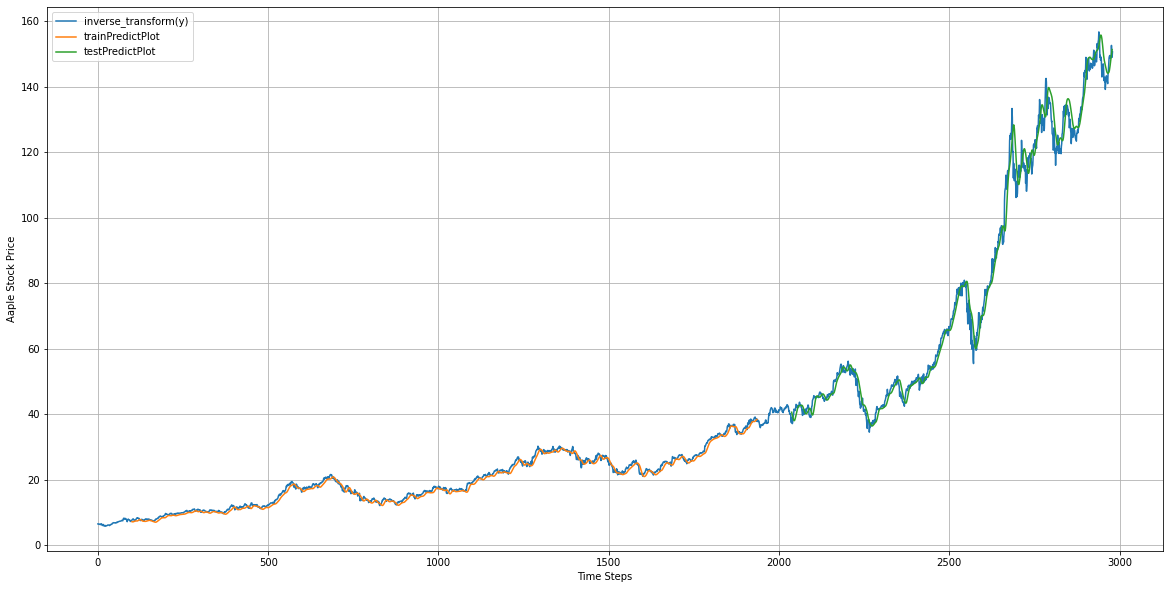

In [97]:
### Plotting 
# shift train predictions for plotting
look_back=100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['inverse_transform(y)','trainPredictPlot','testPredictPlot'])
plt.xlabel('Time Steps')
plt.ylabel('Aaple Stock Price')
plt.show()

This code generates a plot that visualizes the predictions made by the model on the training and testing data, along with the actual target values.

The plot is created using the `matplotlib.pyplot` module. 

First, the code creates empty arrays `trainPredictPlot` and `testPredictPlot` of the same shape as the original target values (`y`), but filled with `NaN` values. These arrays will be used to plot the predicted values.

Next, the predicted values are inserted into the corresponding positions in `trainPredictPlot` and `testPredictPlot`. This is done to align the predictions with the actual target values in the plot. The `look_back` parameter is used to shift the predictions appropriately.

After preparing the data for plotting, the code proceeds to create the plot. It first plots the original target values (`y`) using `scaler.inverse_transform(y)` to revert the scaled values back to their original scale.

Then, it plots `trainPredictPlot` and `testPredictPlot`, which represent the predicted values for the training and testing data, respectively. These values are plotted on the same graph as the original target values.

The legend and labels for the x-axis and y-axis are added to the plot for clarity and understanding.

By executing this code, a plot is generated that shows the actual target values, the predictions made on the training data (`trainPredictPlot`), and the predictions made on the testing data (`testPredictPlot`). This allows for a visual comparison between the predicted and actual values, helping to assess the performance of the model.

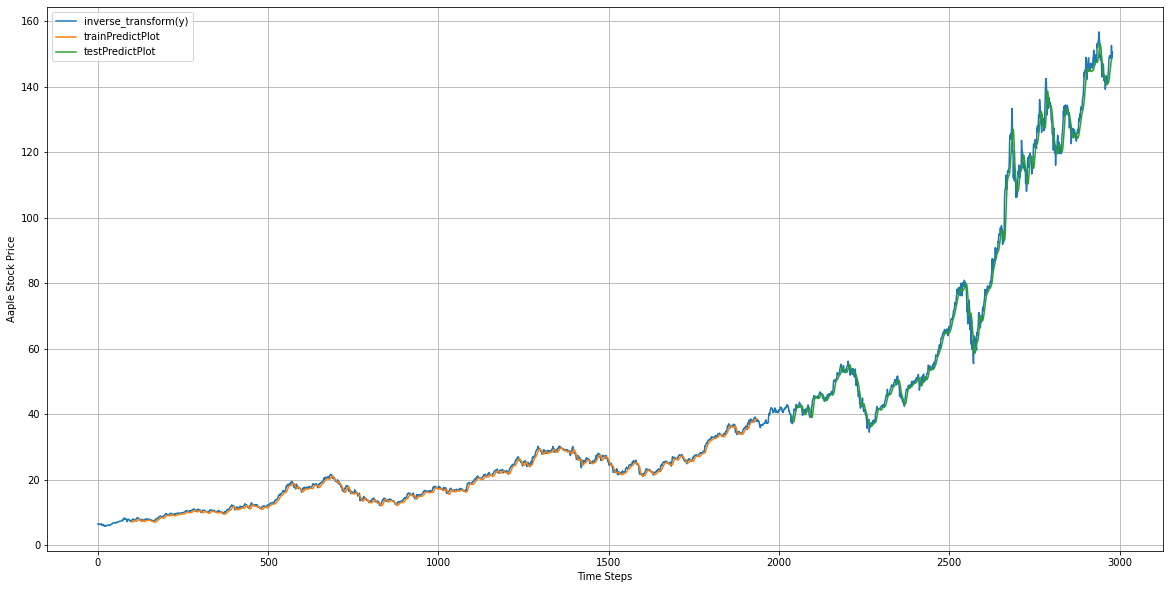

In [29]:
## Plotting 
# shift train predictions for plotting
look_back=100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['inverse_transform(y)','trainPredictPlot','testPredictPlot'])
plt.xlabel('Time Steps')
plt.ylabel('Aaple Stock Price')
plt.show()

This code generates a plot that visualizes the predictions made by the model on the training and testing data, along with the actual target values.

The plot is created using the `matplotlib.pyplot` module.

First, the code sets the value of `look_back` which represents the number of time steps used in the prediction. This is used to shift the predicted values appropriately in the plot.

Next, the code creates two empty arrays, `trainPredictPlot` and `testPredictPlot`, of the same shape as the original target values (`y`). These arrays are filled with `NaN` values to prepare them for plotting.

Then, the predicted values from the training data (`train_predict`) are inserted into `trainPredictPlot`, starting from the index `look_back` and extending to the length of `train_predict`. This ensures that the predicted values are aligned with the corresponding positions in the original target values.

Similarly, the predicted values from the testing data (`test_predict`) are inserted into `testPredictPlot`, starting from the index `len(train_predict) + (look_back * 2) + 1` and extending to the index `len(y) - 1`. This ensures that the predicted values are aligned with the corresponding positions in the original target values.

After preparing the data for plotting, the code proceeds to create the plot. It first plots the original target values (`y`) using `scaler.inverse_transform(y)` to revert the scaled values back to their original scale.

Then, it plots `trainPredictPlot` and `testPredictPlot`, which represent the predicted values for the training and testing data, respectively. These values are plotted on the same graph as the original target values.

The legend and labels for the x-axis and y-axis are added to the plot to provide clarity and understanding.

By executing this code, a plot is generated that shows the actual target values, the predictions made on the training data (`trainPredictPlot`), and the predictions made on the testing data (`testPredictPlot`). This allows for a visual comparison between the predicted and actual values, helping to assess the performance of the model.

In [ ]:
# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=1)
test_mse = model.evaluate(X_test, ytest, verbose=1)


30/30 [==============================] - 3s 108ms/step - loss: 5.4543e-04


This code evaluates the performance of the trained model by calculating the mean squared error (MSE) for both the training and testing datasets.

The `evaluate()` function of the model object is used to compute the MSE. It takes the input data (`X_train` and `X_test`) and the corresponding target values (`y_train` and `ytest`) as input.

By executing this code, the MSE is computed for the training dataset (`X_train` and `y_train`) and for the testing dataset (`X_test` and `ytest`). The MSE represents the average squared difference between the predicted and actual values, providing a measure of the model's performance.

The resulting MSE values, `train_mse` and `test_mse`, are stored and can be used to assess and compare the performance of the model on the training and testing datasets. Lower MSE values indicate better predictive performance, as they reflect smaller average differences between the predicted and actual values.

In [ ]:
train_mse > test_mse

False

This code performs a comparison between the mean squared error (MSE) values obtained from evaluating the model on the training and testing datasets.

The expression `train_mse > test_mse` evaluates whether the MSE value for the training dataset (`train_mse`) is greater than the MSE value for the testing dataset (`test_mse`).

By comparing these two values, the code determines if the model performs better or worse on the training data compared to the testing data. If the condition `train_mse > test_mse` evaluates to `True`, it means that the MSE on the training dataset is greater than the MSE on the testing dataset, indicating that the model performs worse on the training data. Conversely, if the condition evaluates to `False`, it means that the MSE on the training dataset is less than or equal to the MSE on the testing dataset, suggesting that the model performs better or equally well on the training data compared to the testing data.

This comparison provides insights into the generalization ability of the model. If the model performs significantly worse on the training data than on the testing data, it may be overfitting the training data and not effectively capturing the underlying patterns in the data. On the other hand, if the model performs similarly on both datasets, it suggests that it is able to generalize well and make accurate predictions on unseen data.

- Underfitting – Validation and training error high
- Overfitting – Validation error is high, training error low
- Good fit – Validation error low, slightly higher than the training error
- Unknown fit - Validation error low, training error 'high'


- Underfitting: This refers to a situation where both the validation error and the training error are high. It indicates that the model is not able to capture the underlying patterns in the data and is performing poorly in terms of predictive accuracy.
- Overfitting: In this scenario, the validation error is high while the training error is low. It suggests that the model has memorized the training data too well and is not able to generalize to unseen data. Overfitting often occurs when the model is too complex or when there is insufficient training data.
- Good fit: A good fit is characterized by a low validation error, which is slightly higher than the training error. This indicates that the model is performing well on both the training and validation data, achieving a balance between capturing patterns in the data and generalizing to unseen examples.
- Unknown fit: This refers to a situation where the validation error is low while the training error is relatively high. It may indicate that the model is performing well on the validation data, but there could be issues such as noise or inconsistencies in the training data that prevent the model from achieving a lower training error. This fit is less common and may require further investigation.

In [ ]:
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.000, Test: 0.001


This code prints the values of the mean squared error (MSE) for the training and testing datasets.

The expression `'Train: %.3f, Test: %.3f' % (train_mse, test_mse)` is a formatted string that combines the text "Train: " with the value of `train_mse`, and "Test: " with the value of `test_mse`. The `%` operator is used to insert the values of `train_mse` and `test_mse` into the formatted string.

By executing this code, the MSE values for the training and testing datasets are printed. The `.3f` format specifier indicates that the values will be displayed with three decimal places. The printed output provides a summary of the model's performance on the training and testing datasets, allowing for a quick comparison of the MSE values.

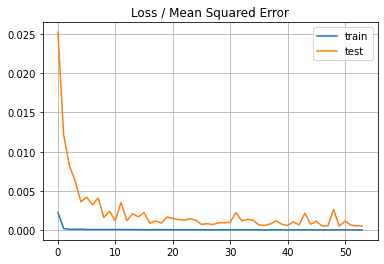

In [ ]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


This code generates a plot of the loss or mean squared error (MSE) during the training process of a model.

By calling `plt.plot()` multiple times, two lines are plotted on the same graph. The first line represents the loss values on the training dataset, and the second line represents the loss values on the testing dataset.

The `history.history` object contains the recorded loss values during the training process, which were collected at each epoch. By accessing the `'loss'` and `'val_loss'` keys of this object, the corresponding loss values for the training and testing datasets are retrieved.

The `plt.title()` function sets the title of the plot to "Loss / Mean Squared Error". The `plt.legend()` function adds a legend to the plot, indicating which line corresponds to the training data and which line corresponds to the testing data.

Finally, the `plt.show()` function is called to display the plot with the loss values on the y-axis and the number of epochs on the x-axis. This plot allows for visual inspection of the training progress and the convergence of the model's loss over time.

- When the validation loss is significantly greater than the training loss, it indicates overfitting. The model has learned the training data too well, resulting in poor performance on unseen data.
- If the validation loss is greater than the training loss (but not significantly), it suggests some overfitting. The model may have memorized certain patterns in the training data that do not generalize well to new data.
- When the validation loss is lower than the training loss, it suggests some underfitting. The model is not capturing the underlying patterns in the data adequately, resulting in suboptimal performance on both the training and validation data.
- If the validation loss is significantly smaller than the training loss, it indicates underfitting. The model is not complex enough to capture the patterns in the training data, resulting in poor performance on both the training and validation data.

Future forecasting 

In [ ]:
len(test_data), len(train_data) # 2021-11-02 test-data last date

(1043, 1937)

This code returns the lengths of the `test_data` and `train_data` datasets. The `len()` function is applied to each dataset separately.

The `len(test_data)` expression returns the number of data points in the `test_data` dataset. Similarly, the `len(train_data)` expression returns the number of data points in the `train_data` dataset.

By executing this code, you obtain two values: the length of the `test_data` dataset and the length of the `train_data` dataset. These values represent the number of data points or observations in each dataset.

It is worth noting that the comment `# 2021-11-02 test-data last date` provides additional information about the context or significance of the test dataset, indicating that the last date of the test data corresponds to November 2, 2021.

In [ ]:
x_input=test_data[943:].reshape(1,-1)
x_input.shape

(1, 100)

This code extracts a portion of the `test_data` array starting from index 943 until the end. The extracted portion is then reshaped into a new array called `x_input`.

The expression `test_data[943:]` retrieves a subset of the `test_data` array starting from index 943 and continuing until the end of the array. This subset contains a sequence of data points.

The `.reshape(1, -1)` method is applied to the extracted subset of `test_data`. The `reshape()` function is used to change the shape of an array. In this case, it reshapes the subset into a new array with dimensions (1, N), where N represents the number of data points in the subset.

The code `x_input.shape` retrieves the shape of the `x_input` array. The `.shape` attribute returns a tuple that represents the dimensions of the array. By executing this code, you obtain the shape of the `x_input` array, which provides information about the number of rows and columns in the array.

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

This code performs operations on the `x_input` array to convert it into a list format.

First, the `x_input` array is assigned to the variable `temp_input`. This is done to avoid modifying the original `x_input` array directly and work with a separate list representation.

The line `temp_input=temp_input[0].tolist()` retrieves the first element of the `temp_input` list and converts it into a standard Python list using the `.tolist()` method. This step is necessary because `temp_input` is initially a list containing a single array element, and we want to extract that element as a standalone list.

By executing this code, the result is a new list named `temp_input` that contains the elements of the first array from the `x_input` array. This conversion allows for easier manipulation and processing of the data in list format.

In [ ]:
temp_input

The code `temp_input` refers to a variable or object in the program. It represents a list that contains a sequence of values.

The exact content of `temp_input` depends on how it was defined and modified within the code. It could store various types of data, such as numbers, strings, or other objects. The values in `temp_input` might have been obtained from a data source or generated during the execution of the program.

To understand the purpose and meaning of `temp_input`, you would need to examine the code where it is used and consider the context in which it is utilized. The name "temp_input" suggests that it may be a temporary storage or intermediate variable used for processing or manipulating data within the program.

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

This code demonstrates the prediction for the next 10 days using a trained model.

The process begins with the initialization of an empty list named `lst_output` which will store the predicted values. The variable `n_steps` is set to 100, indicating the number of time steps used for input sequences in the model.

The code then enters a while loop that iterates until a total of 30 predictions are made. Within each iteration, it checks the length of the `temp_input` list to determine if it has enough data points for prediction. If the length is greater than 100, it proceeds with the prediction process.

First, it extracts a subset of `temp_input` excluding the first element. This subset becomes the input `x_input` for the prediction. The input is reshaped to match the expected shape for the model, specifically as a 3D array with dimensions (1, n_steps, 1).

The model is then used to predict the output (`yhat`) based on the input `x_input`. The predicted value is appended to `lst_output` and added to the `temp_input` list.

If the length of `temp_input` is not greater than 100, it means there is not enough data to form a complete input sequence. In this case, the code reshapes the existing `x_input` and performs the prediction similarly to the previous case.

The loop continues until a total of 30 predictions are made. The final predicted values are stored in `lst_output` and printed at the end of the code.

Overall, this code demonstrates how the model can be used to make predictions for future time steps by utilizing previous predictions as input.

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

This code initializes two arrays, `day_new` and `day_pred`, which are used to represent the time steps for the new data and the predicted data, respectively.

The `day_new` array is created using the `np.arange` function, which generates a sequence of numbers from 1 to 100 with a step size of 1. This array represents the time steps for which the model has actual data available.

The `day_pred` array is also created using the `np.arange` function, but with different start and end values. It generates a sequence of numbers from 101 to 130, representing the time steps for which the model will make predictions.

In summary, the `day_new` array represents the time steps with known data, while the `day_pred` array represents the time steps for which the model will make predictions.

In [ ]:
import matplotlib.pyplot as plt

This code imports the `matplotlib.pyplot` module, which is a plotting library in Python. It provides a collection of functions that allow us to create various types of plots, such as line plots, bar plots, scatter plots, and more. By importing this module, we gain access to its functions and can use them to create visualizations of our data.

In [ ]:
len(y)

2980

This code returns the length of the variable `y`. The variable `y` could represent a list, array, or any other iterable object. The `len()` function is a built-in Python function that returns the number of elements in the given object. In this case, it calculates the number of elements in `y` and returns the result. The value represents the total count or length of the elements in `y`.

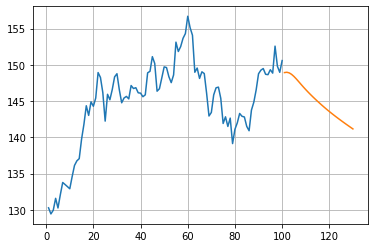

In [ ]:
plt.plot(day_new,scaler.inverse_transform(y[2880:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

This code creates a line plot using the `plt.plot()` function from the `matplotlib.pyplot` library. It plots two sets of data points on the same graph. 

The first line of the plot, `plt.plot(day_new,scaler.inverse_transform(y[2880:]))`, plots the data points for the original values of the time series. It uses the `day_new` variable as the x-values and the corresponding subset of `y` values as the y-values. The `scaler.inverse_transform()` function is used to transform the scaled values back to their original scale.

The second line of the plot, `plt.plot(day_pred,scaler.inverse_transform(lst_output))`, plots the predicted values of the time series. It uses the `day_pred` variable as the x-values and the corresponding values from the `lst_output` list as the y-values. Again, the `scaler.inverse_transform()` function is used to transform the scaled predicted values back to their original scale.

By plotting both the original values and the predicted values on the same graph, this code allows for a visual comparison of the actual and predicted trends of the time series.

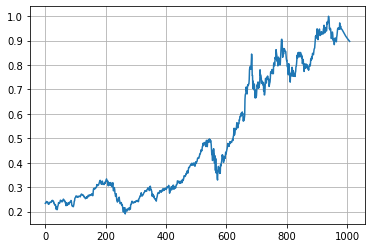

In [ ]:
df3=y.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])


This code converts the `y` variable, which represents the original values of a time series, into a list using the `tolist()` method. It then extends this list by appending the values from the `lst_output` list, which contains the predicted values for the time series. 

The `plt.plot()` function is then used to create a line plot of the combined list of values, starting from index 2000. This plot visualizes the trend of the original values followed by the predicted values for the time series.

By plotting both the original and predicted values on the same graph, this code allows for a visual comparison of how well the predicted values align with the actual trend of the time series.

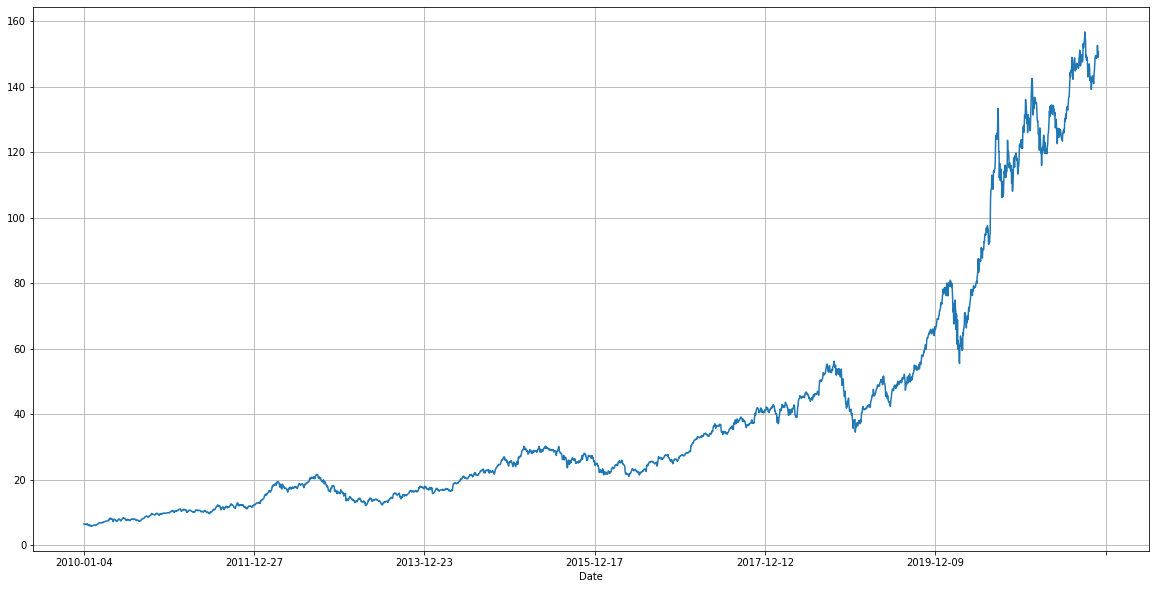

In [ ]:
df1.set_index('Date')['Adj Close'].plot(figsize=FIGURE_SIZE)

This code plots a line graph of the 'Adj Close' values from the DataFrame 'df1' against the 'Date' column. The 'set_index('Date')' function is used to set the 'Date' column as the index of the DataFrame, which allows for easy plotting of the time series data. 

The 'plot(figsize=FIGURE_SIZE)' function is then called on the 'Adj Close' column to generate the line plot. The 'figsize' parameter is set to 'FIGURE_SIZE', which determines the size of the figure or plot on the output. 

By plotting the 'Adj Close' values against the corresponding dates, this code provides a visual representation of the historical performance or trend of the 'Adj Close' variable over time.

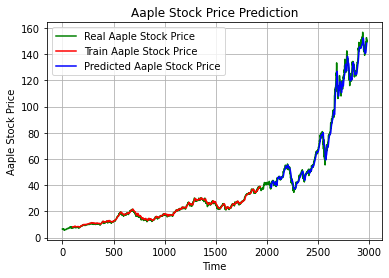

In [ ]:
# Visualising the results. with details 

plt.plot(scaler.inverse_transform(y), color='Green', label='Real Aaple Stock Price')
plt.plot(trainPredictPlot, color='Red', label='Train Aaple Stock Price')
plt.plot(testPredictPlot, color='Blue', label='Predicted Aaple Stock Price')

plt.title('Aaple Stock Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Aaple Stock Price')
plt.legend()
plt.show()

This code generates a line graph to visualize the predicted and actual Apple stock prices. 

The first line, 'plt.plot(scaler.inverse_transform(y), color='Green', label='Real Apple Stock Price')', plots the actual stock prices (stored in 'y') after applying the inverse transformation using the scaler object. The stock prices are displayed in green on the graph.

The second line, 'plt.plot(trainPredictPlot, color='Red', label='Train Apple Stock Price')', plots the predicted stock prices for the training data (stored in 'trainPredictPlot'). These predicted prices are displayed in red on the graph.

The third line, 'plt.plot(testPredictPlot, color='Blue', label='Predicted Apple Stock Price')', plots the predicted stock prices for the test data (stored in 'testPredictPlot'). These predicted prices are displayed in blue on the graph.

The following lines set the title of the graph to 'Apple Stock Price Prediction' and label the x-axis as 'Time Steps' and the y-axis as 'Apple Stock Price'. The legend is displayed to indicate the meaning of the different colored lines on the graph.

By plotting the actual and predicted stock prices, this code provides a visual comparison of the model's predictions against the real stock prices.

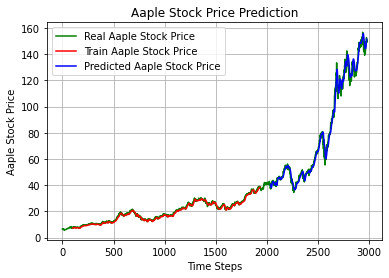

In [96]:
# Visualising the results. 

plt.plot(scaler.inverse_transform(y), color='Green', label='Real Aaple Stock Price')
plt.plot(trainPredictPlot, color='Red', label='Train Aaple Stock Price')
plt.plot(testPredictPlot, color='Blue', label='Predicted Aaple Stock Price')

plt.title('Aaple Stock Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Aaple Stock Price')
plt.legend()
plt.show()

This code visualizes the predicted and actual Apple stock prices using a line graph.

The first line, 'plt.plot(scaler.inverse_transform(y), color='Green', label='Real Apple Stock Price')', plots the actual stock prices (stored in 'y') after applying the inverse transformation using the scaler object. The stock prices are displayed in green on the graph.

The second line, 'plt.plot(trainPredictPlot, color='Red', label='Train Apple Stock Price')', plots the predicted stock prices for the training data (stored in 'trainPredictPlot'). These predicted prices are displayed in red on the graph.

The third line, 'plt.plot(testPredictPlot, color='Blue', label='Predicted Apple Stock Price')', plots the predicted stock prices for the test data (stored in 'testPredictPlot'). These predicted prices are displayed in blue on the graph.

The following lines set the title of the graph to 'Apple Stock Price Prediction' and label the x-axis as 'Time Steps' and the y-axis as 'Apple Stock Price'. The legend is displayed to indicate the meaning of the different colored lines on the graph.

By plotting the actual and predicted stock prices, this code provides a visual comparison of the model's predictions against the real stock prices.

Bidirectional LSTM

In [ ]:
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional


This code imports necessary libraries and modules for building a LSTM-based neural network model.

The line 'from random import random' imports the 'random' function from the 'random' module. This function generates random numbers and is used for generating sample data in this code.

The line 'from numpy import array' imports the 'array' function from the 'numpy' module. This function is used to create arrays, which are used to store and manipulate data in numerical computations.

The line 'from numpy import cumsum' imports the 'cumsum' function from the 'numpy' module. This function calculates the cumulative sum of elements along a given axis in an array.

The line 'from keras.models import Sequential' imports the 'Sequential' class from the 'models' module in the 'keras' library. The 'Sequential' class is used to create a sequential model, which is a linear stack of layers in a neural network.

The line 'from keras.layers import LSTM' imports the 'LSTM' layer from the 'layers' module in the 'keras' library. The 'LSTM' layer represents a Long Short-Term Memory unit, which is a type of recurrent neural network layer capable of capturing long-term dependencies in sequential data.

The line 'from keras.layers import Dense' imports the 'Dense' layer from the 'layers' module in the 'keras' library. The 'Dense' layer is a fully connected layer in a neural network, where each neuron is connected to every neuron in the previous and next layers.

The line 'from keras.layers import TimeDistributed' imports the 'TimeDistributed' layer from the 'layers' module in the 'keras' library. The 'TimeDistributed' layer is used to apply the same layer configuration to every time step of a recurrent neural network.

The line 'from keras.layers import Bidirectional' imports the 'Bidirectional' layer from the 'layers' module in the 'keras' library. The 'Bidirectional' layer wraps an existing layer, such as LSTM, and processes the input sequence in both forward and backward directions, effectively capturing information from both past and future contexts.

In [ ]:
tf.random.set_seed(1234)

This code sets the random seed for TensorFlow to a specific value of 1234. 

Setting the random seed ensures that the generated random numbers are deterministic and reproducible. In machine learning models, random initialization or random operations are often involved, and setting the random seed allows us to obtain consistent results across multiple runs or different environments.

By setting the random seed to the same value, TensorFlow will generate the same sequence of random numbers every time the code is executed. This is useful for tasks such as model evaluation, debugging, or comparing different models' performances under the same random conditions.

In summary, setting the random seed helps to create a controlled environment for TensorFlow computations, enabling reproducibility and consistent results.

In [ ]:

modell = Sequential()
modell.add(Bidirectional(LSTM(100, activation='relu', input_shape=(100,1)))) #elu
#modell.add(Bidirectional(LSTM(50, dropout=0.5)))

#modell.add(Bidirectional(LSTM(100, dropout=0.5)))
#modell.add(BatchNormalization(momentum=0.6))
modell.add(Dense(1))
modell.compile(loss='mean_squared_error', optimizer='adam') #rmsprop adam




This code defines a sequential model in Keras for a bidirectional LSTM (Long Short-Term Memory) neural network. 

The model is constructed using the `Sequential` class, which allows for a linear stack of layers. The first layer added to the model is a bidirectional LSTM layer with 100 units. The bidirectional LSTM layer processes the input sequence in both forward and backward directions, capturing information from past and future time steps. The activation function used in the LSTM layer is ReLU (Rectified Linear Unit), which introduces non-linearity to the network.

After the LSTM layer, a dense layer with a single unit is added. This dense layer is a fully connected layer that maps the output of the LSTM layer to a single scalar value, representing the predicted output. The model is compiled using the mean squared error loss function and the Adam optimizer.

Overall, this code defines a sequential model with a bidirectional LSTM layer for a regression task, where the model takes input sequences of length 100 and predicts a single scalar value.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

This code imports the `EarlyStopping` callback class from the `tensorflow.keras.callbacks` module. 

The `EarlyStopping` callback is a convenient tool used during the training of a neural network model. It allows for the early stopping of training based on certain criteria. 

By utilizing the `EarlyStopping` callback, you can monitor the performance of the model during training and stop the training process if a specified metric, such as the validation loss, does not improve after a certain number of epochs. 

This helps in preventing overfitting and allows for the selection of the best model based on its performance on unseen data. The `EarlyStopping` callback can be used in conjunction with other callbacks and parameters to optimize the training process and improve the overall performance of the model.

In [ ]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30, 
        verbose=1, mode='auto', restore_best_weights=True)

history1=modell.fit(X_train,y_train,validation_data=(X_test,ytest),
        callbacks=[monitor],verbose=1,epochs=1000)

Epoch 1/1000
58/58 [==============================] - 10s 130ms/step - loss: 0.0011 - val_loss: 0.0045
Epoch 2/1000
58/58 [==============================] - 7s 123ms/step - loss: 6.9045e-05 - val_loss: 0.0045
Epoch 3/1000
58/58 [==============================] - 7s 123ms/step - loss: 5.0616e-05 - val_loss: 0.0214
Epoch 4/1000
58/58 [==============================] - 7s 122ms/step - loss: 4.1579e-05 - val_loss: 0.0956
Epoch 5/1000
58/58 [==============================] - 7s 123ms/step - loss: 3.6684e-05 - val_loss: 0.7866
Epoch 6/1000
58/58 [==============================] - 7s 123ms/step - loss: 3.3519e-05 - val_loss: 0.1545
Epoch 7/1000
58/58 [==============================] - 7s 123ms/step - loss: 2.8318e-05 - val_loss: 0.0865
Epoch 8/1000
58/58 [==============================] - 7s 127ms/step - loss: 2.7666e-05 - val_loss: 0.0919
Epoch 9/1000
58/58 [==============================] - 7s 123ms/step - loss: 2.5015e-05 - val_loss: 0.0526
Epoch 10/1000
58/58 [============================

This code sets up the `EarlyStopping` callback with specific parameters and assigns it to the variable `monitor`. 

The `EarlyStopping` callback is configured to monitor the validation loss (`val_loss`) during the training process. It will compare the change in validation loss between consecutive epochs and consider it as a significant improvement if the change is greater than or equal to `min_delta` (set to 1e-3 in this case). 

The `patience` parameter is set to 30, which means that training will continue for up to 30 epochs without improvement in the validation loss before stopping early. 

The `verbose` parameter is set to 1, which enables the output of messages about the stopping condition. 

The `mode` parameter is set to 'auto', which automatically determines the direction of improvement based on the monitored quantity (in this case, validation loss). 

The `restore_best_weights` parameter is set to True, which means that the weights of the model will be restored to the ones that achieved the best performance on the validation set. 

The `modell.fit()` function is then called to train the model using the training data (`X_train` and `y_train`). The validation data (`X_test` and `ytest`) is provided to monitor the model's performance during training. The `callbacks` argument is set to `[monitor]`, which includes the `EarlyStopping` callback in the training process. The `verbose` parameter is set to 1 to display the progress of training. The training will run for a maximum of 1000 epochs, or until early stopping is triggered. The training history is stored in the `history1` variable for further analysis or visualization.

In [ ]:
modell.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 200)              81600     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 81,801
Trainable params: 81,801
Non-trainable params: 0
_________________________________________________________________


This code prints a summary of the model architecture and provides information about the number of parameters in each layer. 

The `summary()` function is called on the `modell` model object to generate a summary table. The summary includes the following information for each layer:

- Layer type: Indicates the type of layer in the model, such as `Bidirectional` or `Dense`.
- Output Shape: Specifies the shape of the output tensor from each layer. It provides information about the dimensions of the output tensor, except for the batch size.
- Param: Indicates the number of trainable parameters in the layer. It includes both the weights and biases of the layer.
- Connected to: Specifies the layers to which the current layer is connected. It shows the flow of data within the model architecture.

The summary table helps in understanding the model's structure, the number of parameters, and the connections between different layers. It can be useful for debugging, optimizing the model, or gaining insights into the model's complexity and performance.

Each time the code is executed, the results may vary.

To ensure consistent results, it is recommended to:

- Set a random seed to control the random number generation process.
- Save the weights of the model or save the entire model after training.

By setting a random seed, the same sequence of random numbers will be generated, which can help in reproducing the same results across multiple runs.

Saving the weights or the entire model allows us to load the model later and use it for predictions or further training, ensuring consistency in the results.

These practices help in maintaining the reproducibility and consistency of the code's outcomes, allowing for better comparison and analysis of results.

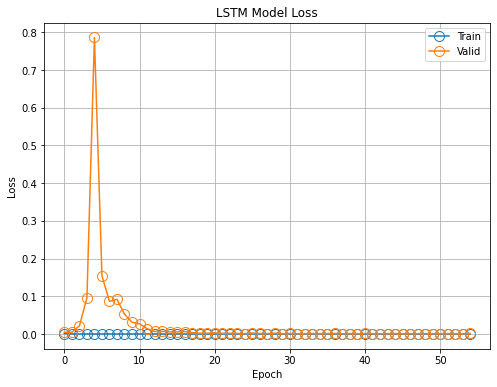

In [ ]:
plot_1(history1, 'Training / Validation Losses from History')

This code visualizes the training and validation losses from the history object. It plots the training and validation loss values over the epochs of the model training.

The function "plot_1" is likely a custom function that takes the history object as input and generates a plot. The plot shows the trend of the training and validation losses over the training process. The x-axis represents the epochs, while the y-axis represents the loss values. The plot helps in understanding the performance of the model during training and evaluating whether the model is overfitting or underfitting.

By analyzing the plot, one can observe the convergence of the training and validation losses. If the training loss decreases while the validation loss increases, it indicates overfitting, suggesting that the model is memorizing the training data too well and not generalizing to new data. On the other hand, if both the training and validation losses decrease and remain close, it indicates a good fit, suggesting that the model is learning the patterns in the data effectively. The plot provides insights into the model's training progress and helps in assessing its performance.

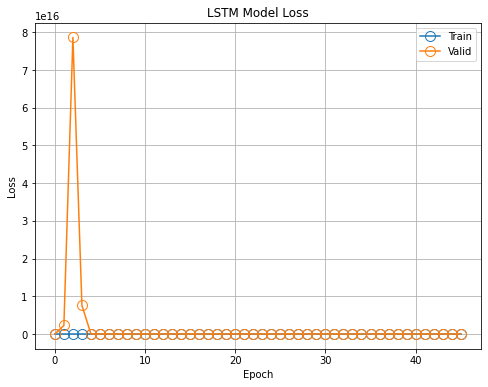

In [ ]:
plot_1(history1, 'Training / Validation Losses from History')

This code likely calls a function named "plot_1" with two arguments: the history object (history1) and a string ('Training / Validation Losses from History'). The purpose of this code is to generate a plot that visualizes the training and validation losses from the history of the model training process.

The function "plot_1" takes the history object as input, which typically contains information about the loss values and other metrics recorded during the training of a machine learning model. The function uses this information to create a plot that shows the trend of the training and validation losses over the epochs or iterations of the model training.

The plot provides a visual representation of how the model's loss values have changed over time. It helps in analyzing the performance of the model during training and identifying any patterns or trends in the loss values. By examining the plot, one can gain insights into whether the model is learning effectively, whether there is any overfitting or underfitting, and how the training and validation losses compare to each other.

The inclusion of the string 'Training / Validation Losses from History' likely serves as the title or label for the plot, providing a brief description of what the plot represents.

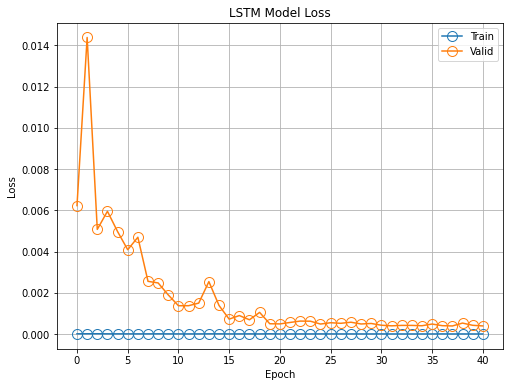

In [ ]:
plot_1(history1, 'Training / Validation Losses from History')

The code `plot_1(history1, 'Training / Validation Losses from History')` suggests that there is a function called `plot_1` being called with two arguments: `history1` and the string `'Training / Validation Losses from History'`. The purpose of this code is to generate a plot that displays the training and validation losses from a given history object.

The `history1` object likely contains information about the loss values during the training process of a machine learning model. This information includes the training loss and validation loss recorded at each epoch or iteration of the training. The `plot_1` function takes this history object as input and uses it to create a plot that visualizes the trend of the training and validation losses.

The resulting plot provides a graphical representation of how the loss values change over the training iterations. It allows for the analysis of the model's performance and helps in assessing the effectiveness of the training process. By examining the plot, one can identify patterns or trends in the loss values, such as convergence or fluctuations, and gain insights into the model's ability to learn from the training data.

The inclusion of the string `'Training / Validation Losses from History'` likely serves as the title or label for the plot, providing a descriptive title that indicates the type of information being presented in the plot.

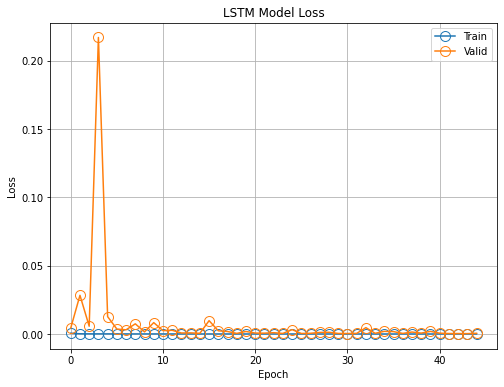

In [ ]:
plot_1(history1, 'Training / Validation Losses from History')

The code `plot_1(history1, 'Training / Validation Losses from History')` calls a function named `plot_1` and passes two arguments to it: `history1` and the string `'Training / Validation Losses from History'`. The purpose of this code is to generate a plot that visualizes the training and validation losses from a given history object.

The `history1` object is typically obtained after training a machine learning model and contains information about the loss values during the training process. This includes the recorded values of the training loss and validation loss at each training iteration or epoch.

The `plot_1` function is designed to take this history object as input and create a graphical representation of the training and validation losses. The resulting plot allows for an analysis of the model's performance during training by visually examining the trends and patterns in the loss values.

By providing the string `'Training / Validation Losses from History'` as the second argument, the code sets a descriptive title for the plot, which helps in understanding the content of the plot at a glance.

In summary, the code `plot_1(history1, 'Training / Validation Losses from History')` generates a plot that showcases the training and validation losses from the training history of a machine learning model, providing insights into the model's learning progress and performance.

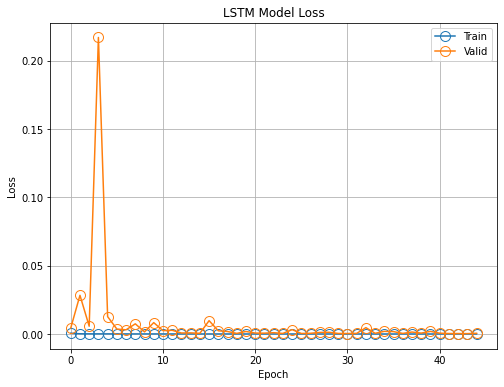

In [ ]:
plot_1(history1, 'Training / Validation Losses from History')

The code `plot_1(history1, 'Training / Validation Losses from History')` calls a function named `plot_1` and passes two arguments to it: `history1` and the string `'Training / Validation Losses from History'`. The purpose of this code is to generate a plot that illustrates the training and validation losses obtained during the training process of a machine learning model.

The `history1` object typically contains recorded information about the model's performance, such as the training loss and validation loss at each epoch or iteration. The `plot_1` function takes this history object as input and creates a graphical representation of the losses.

The resulting plot provides a visual depiction of how the model's performance evolves over time. It allows us to observe the trends and patterns in the training and validation losses, which are important metrics for evaluating the model's accuracy and generalization capabilities.

By setting the string `'Training / Validation Losses from History'` as the plot's title, the code provides a descriptive label that summarizes the content of the plot.

In summary, the code `plot_1(history1, 'Training / Validation Losses from History')` generates a plot that visually presents the training and validation losses from the model's training history, enabling us to assess its performance and track its progress.

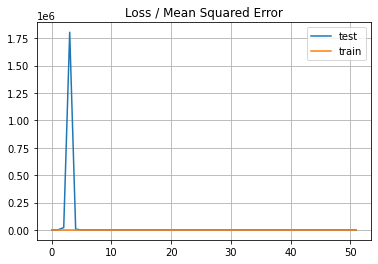

In [ ]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

The provided code utilizes the `pyplot` module from the `matplotlib` library to create a plot that illustrates the training and validation losses of a machine learning model.

Firstly, the line `pyplot.title('Loss / Mean Squared Error')` sets the title of the plot as "Loss / Mean Squared Error". This title provides a concise description of the information presented in the plot.

Next, the line `pyplot.plot(history1.history['val_loss'], label='test')` plots the validation loss values recorded in the `history1` object. The use of the label 'test' enables us to distinguish the corresponding line in the plot and associate it with the validation loss.

Similarly, the line `pyplot.plot(history1.history['loss'], label='train')` plots the training loss values recorded in the `history1` object. The label 'train' is assigned to this line to differentiate it from the validation loss line.

To enhance the plot's readability, the line `pyplot.legend()` adds a legend that displays the labels 'test' and 'train' for the corresponding lines. This legend helps to identify and interpret the information presented in the plot.

Finally, the line `pyplot.show()` displays the plot on the screen, allowing the user to visualize the training and validation losses.

In summary, this code generates a plot that provides insights into the performance of a machine learning model by visualizing the trend of training and validation losses. It facilitates the assessment of the model's learning progress, potential overfitting or underfitting, and the effectiveness of the chosen loss function.

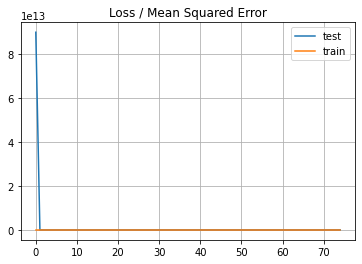

In [ ]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

The provided code uses the `pyplot` module from the `matplotlib` library to create a plot that visualizes the training and validation losses of a machine learning model.

The line `pyplot.title('Loss / Mean Squared Error')` sets the title of the plot as "Loss / Mean Squared Error". This title gives a brief description of the information being displayed in the plot.

The next line, `pyplot.plot(history1.history['val_loss'], label='test')`, plots the validation loss values stored in the `history1` object. The label 'test' is assigned to this line, which helps identify it in the plot.

Similarly, the line `pyplot.plot(history1.history['loss'], label='train')` plots the training loss values stored in the `history1` object. The label 'train' is assigned to this line to distinguish it from the validation loss line.

To provide a legend for the plot, the line `pyplot.legend()` is used. This adds a legend to the plot that displays the labels 'test' and 'train', making it easier to identify which line corresponds to which type of loss.

Finally, the line `pyplot.show()` displays the plot on the screen, allowing the user to view and analyze the training and validation loss trends.

In summary, this code generates a plot that visualizes the training and validation losses of a machine learning model, helping to assess its performance and monitor the convergence of the training process.

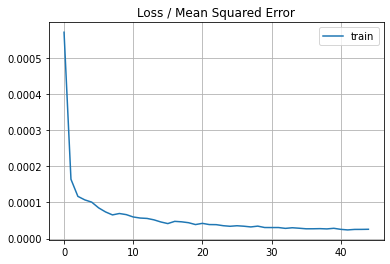

In [ ]:
pyplot.title('Loss / Mean Squared Error')
#pyplot.plot(history1.history['val_loss'], label='test')
pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

The provided code uses the `pyplot` module from the `matplotlib` library to create a plot that visualizes the training loss of a machine learning model.

The line `pyplot.title('Loss / Mean Squared Error')` sets the title of the plot as "Loss / Mean Squared Error". This title provides information about the type of loss being displayed in the plot.

The next line, `pyplot.plot(history1.history['loss'], label='train')`, plots the training loss values stored in the `history1` object. The label 'train' is assigned to this line to identify it in the plot.

To provide a legend for the plot, the line `pyplot.legend()` is used. This adds a legend to the plot that displays the label 'train', indicating that it represents the training loss.

Finally, the line `pyplot.show()` displays the plot on the screen, allowing the user to view and analyze the training loss trend.

In summary, this code generates a plot that visualizes the training loss of a machine learning model, providing insights into the model's learning progress and performance.

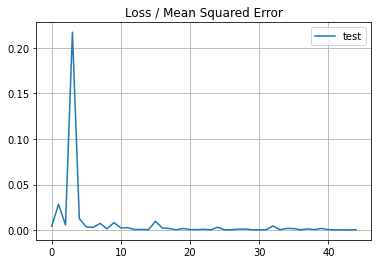

In [ ]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history1.history['val_loss'], label='test')
#pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

The given code snippet uses the `pyplot` module from the `matplotlib` library to create a plot that visualizes the validation loss of a machine learning model.

The line `pyplot.title('Loss / Mean Squared Error')` sets the title of the plot as "Loss / Mean Squared Error". This title provides information about the type of loss being displayed in the plot.

The next line, `pyplot.plot(history1.history['val_loss'], label='test')`, plots the validation loss values stored in the `history1` object. The label 'test' is assigned to this line to identify it in the plot.

To provide a legend for the plot, the line `pyplot.legend()` is used. This adds a legend to the plot that displays the label 'test', indicating that it represents the validation loss.

Finally, the line `pyplot.show()` displays the plot on the screen, allowing the user to view and analyze the validation loss trend.

In summary, this code generates a plot that visualizes the validation loss of a machine learning model, providing insights into the model's performance on unseen data.

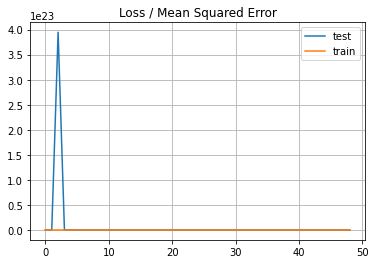

In [ ]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

The given code snippet uses the `pyplot` module from the `matplotlib` library to create a plot that displays the training and validation losses of a machine learning model.

The line `pyplot.title('Loss / Mean Squared Error')` sets the title of the plot as "Loss / Mean Squared Error". This title provides information about the type of loss being displayed in the plot.

The next line, `pyplot.plot(history1.history['val_loss'], label='test')`, plots the validation loss values stored in the `history1` object. The label 'test' is assigned to this line to identify it in the plot.

Similarly, the line `pyplot.plot(history1.history['loss'], label='train')` plots the training loss values stored in the `history1` object. The label 'train' is assigned to this line.

To provide a legend for the plot, the line `pyplot.legend()` is used. This adds a legend to the plot that displays the labels 'test' and 'train', indicating which line corresponds to the validation loss and training loss, respectively.

Finally, the line `pyplot.show()` displays the plot on the screen, allowing the user to view and compare the training and validation loss curves.

In summary, this code generates a plot that visually compares the training and validation losses of a machine learning model, providing insights into the model's performance and potential overfitting or underfitting.

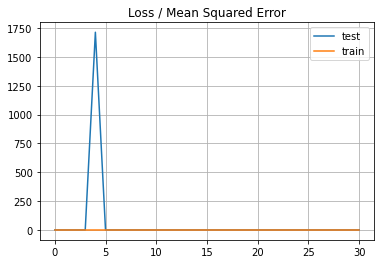

In [ ]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()
pyplot.show()

The given code generates a plot that visualizes the loss values of a machine learning model during training. 

The line `pyplot.title('Loss / Mean Squared Error')` sets the title of the plot as "Loss / Mean Squared Error", providing a description of the type of loss being plotted.

The next line, `pyplot.plot(history1.history['val_loss'], label='test')`, plots the validation loss values stored in the `history1` object. The label 'test' is assigned to this line, indicating that it represents the validation loss.

Similarly, the line `pyplot.plot(history1.history['loss'], label='train')` plots the training loss values stored in the `history1` object. The label 'train' is assigned to this line, indicating that it represents the training loss.

The line `pyplot.legend()` adds a legend to the plot, displaying the labels 'test' and 'train' to identify the corresponding lines.

Finally, `pyplot.show()` displays the plot on the screen, allowing the user to visualize and compare the training and validation loss curves.

In summary, this code generates a plot that shows the training and validation loss values of a machine learning model, helping to assess the model's performance and convergence during training.

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'],loc='upper right')
plt.show()

The provided code generates a plot that visualizes the training and validation loss values of a machine learning model.

The lines `plt.plot(history1.history['loss'])` and `plt.plot(history1.history['val_loss'])` plot the training loss and validation loss values, respectively. These values are obtained from the `history1` object.

The line `plt.title('model loss')` sets the title of the plot as "model loss", providing a description of the type of loss being plotted.

The line `plt.ylabel('loss')` assigns the label "loss" to the y-axis of the plot, indicating that it represents the loss values.

The line `plt.xlabel('epoch')` assigns the label "epoch" to the x-axis of the plot, indicating that it represents the number of training epochs.

The line `plt.legend(['train', 'test'],loc='upper right')` adds a legend to the plot, with the labels 'train' and 'test', to indicate which line represents the training loss and validation loss, respectively. The `loc='upper right'` parameter specifies the position of the legend on the plot.

Finally, `plt.show()` displays the plot on the screen, allowing the user to visualize and compare the training and validation loss curves.

In summary, this code generates a plot that shows the training and validation loss values of a machine learning model, providing insights into the model's performance and convergence over epochs.

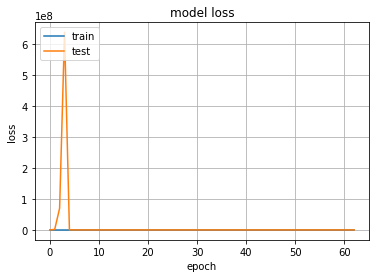

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The provided code generates a line plot that visualizes the training and validation loss values of a machine learning model.

The line `plt.plot(history1.history['loss'])` plots the training loss values over the epochs. These values are obtained from the `history1` object.

The line `plt.plot(history1.history['val_loss'])` plots the validation loss values over the epochs. Similarly, these values are also obtained from the `history1` object.

The line `plt.title('model loss')` sets the title of the plot as "model loss", providing a descriptive label for the type of loss being plotted.

The line `plt.ylabel('loss')` assigns the label "loss" to the y-axis of the plot, indicating that it represents the loss values.

The line `plt.xlabel('epoch')` assigns the label "epoch" to the x-axis of the plot, indicating that it represents the number of training epochs.

The line `plt.legend(['train', 'test'], loc='upper left')` adds a legend to the plot, with the labels 'train' and 'test', indicating which line represents the training loss and validation loss, respectively. The `loc='upper left'` parameter specifies the position of the legend on the plot.

Finally, `plt.show()` displays the plot on the screen, allowing the user to visualize and compare the training and validation loss curves.

In summary, this code generates a line plot that illustrates the training and validation loss values of a machine learning model, enabling the user to assess the model's performance and convergence over epochs.

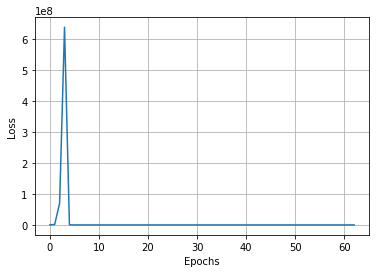

In [ ]:
plt.plot(history1.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

The provided code generates a line plot that visualizes the validation loss values of a machine learning model over the training epochs.

The line `plt.plot(history1.history['val_loss'])` plots the validation loss values obtained from the `history1` object. These values represent the loss of the model on a separate validation dataset during each training epoch.

The line `plt.xlabel('Epochs')` assigns the label "Epochs" to the x-axis of the plot, indicating that it represents the number of training epochs.

The line `plt.ylabel('Loss')` assigns the label "Loss" to the y-axis of the plot, indicating that it represents the loss values.

Finally, `plt.show()` displays the plot on the screen, allowing the user to visualize the trend of the validation loss over the training epochs.

In summary, this code generates a line plot that shows the variation of the validation loss values of a machine learning model as the training progresses. It provides insights into how the model's performance on the validation data improves or deteriorates over the course of the training process.

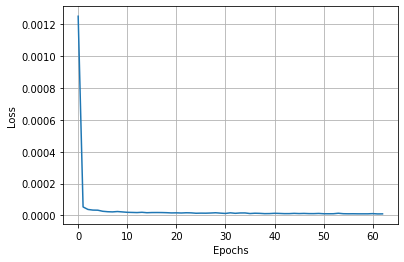

In [ ]:
plt.plot(history1.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

The provided code generates a line plot that visualizes the training loss values of a machine learning model over the training epochs.

The line `plt.plot(history1.history['loss'])` plots the training loss values obtained from the `history1` object. These values represent the loss of the model on the training data during each training epoch.

The line `plt.xlabel('Epochs')` assigns the label "Epochs" to the x-axis of the plot, indicating that it represents the number of training epochs.

The line `plt.ylabel('Loss')` assigns the label "Loss" to the y-axis of the plot, indicating that it represents the loss values.

Finally, `plt.show()` displays the plot on the screen, allowing the user to visualize the trend of the training loss over the training epochs.

In summary, this code generates a line plot that shows the variation of the training loss values of a machine learning model as the training progresses. It provides insights into how well the model is learning from the training data and improving its performance over the course of the training process.

In [ ]:
train_predict=modell.predict(X_train)
test_predict=modell.predict(X_test)

The provided code uses a trained model (`modell`) to make predictions on the training and test datasets.

`train_predict` is a variable that stores the predicted values obtained by applying the trained model (`modell`) on the input data (`X_train`). These predictions represent the model's estimated outputs for the training dataset.

Similarly, `test_predict` is a variable that stores the predicted values obtained by applying the trained model (`modell`) on the test data (`X_test`). These predictions represent the model's estimated outputs for the test dataset.

By making predictions on both the training and test datasets, this code allows us to evaluate the performance of the model on unseen data and assess its ability to generalize beyond the training set. These predictions can be further analyzed and compared against the actual target values to measure the accuracy and effectiveness of the trained model.

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

The provided code performs a transformation to convert the predicted values obtained from the model back to their original scale or units.

`train_predict` contains the predicted values for the training dataset, and `test_predict` contains the predicted values for the test dataset. These predictions were previously obtained using a machine learning model and may have been scaled or normalized for training purposes.

To restore the predictions to their original form, the code applies the inverse transformation using the `scaler.inverse_transform()` method. This method reverses the scaling or normalization that was applied to the data during the preprocessing stage.

By transforming the predictions back to their original scale, we obtain values that are directly comparable to the original target variable or output. This allows for a meaningful interpretation and evaluation of the model's performance in the context of the original data domain.

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

90.12779797520199

The provided code calculates the root mean squared error (RMSE) between the actual test data (`ytest`) and the predicted test data (`test_predict`).

The RMSE is a commonly used metric for evaluating the performance of a regression model. It measures the average magnitude of the differences between the predicted values and the actual values. A lower RMSE indicates that the model's predictions are closer to the true values, while a higher RMSE suggests greater deviations between the predicted and actual values.

To calculate the RMSE, the code first imports the necessary functions from the `sklearn.metrics` module. Then it calls the `mean_squared_error()` function, which computes the mean squared error (MSE) between `ytest` and `test_predict`. The MSE is the average of the squared differences between the predicted and actual values. Finally, the code applies the `math.sqrt()` function to the MSE to obtain the RMSE.

By evaluating the RMSE, we can assess the accuracy and effectiveness of the model in predicting the test data. A lower RMSE indicates better performance and greater accuracy in the predictions.

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

20.744551350170173

This code calculates the root mean squared error (RMSE) between the actual training data (`y_train`) and the predicted training data (`train_predict`).

The RMSE is a commonly used metric for evaluating the performance of a regression model. It measures the average magnitude of the differences between the predicted values and the actual values. A lower RMSE indicates that the model's predictions are closer to the true values, while a higher RMSE suggests greater deviations between the predicted and actual values.

To calculate the RMSE, the code first imports the necessary functions from the `math` and `sklearn.metrics` modules. It then calls the `mean_squared_error()` function, which calculates the mean squared error (MSE) between `y_train` and `train_predict`. The MSE is the average of the squared differences between the predicted and actual values. Finally, the code applies the `math.sqrt()` function to the MSE to obtain the RMSE.

By evaluating the RMSE, we can assess the accuracy and effectiveness of the model in predicting the training data. A lower RMSE indicates better performance and greater accuracy in the predictions.

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

83.66756700809603

This code calculates the root mean squared error (RMSE) between the actual test data (`ytest`) and the predicted test data (`test_predict`).

The RMSE is a commonly used metric for evaluating the performance of a regression model. It measures the average magnitude of the differences between the predicted values and the actual values. A lower RMSE indicates that the model's predictions are closer to the true values, while a higher RMSE suggests greater deviations between the predicted and actual values.

To calculate the RMSE, the code first imports the necessary functions from the `math` and `sklearn.metrics` modules. It then calls the `mean_squared_error()` function, which calculates the mean squared error (MSE) between `ytest` and `test_predict`. The MSE is the average of the squared differences between the predicted and actual values. Finally, the code applies the `math.sqrt()` function to the MSE to obtain the RMSE.

By evaluating the RMSE, we can assess the accuracy and effectiveness of the model in predicting the test data. A lower RMSE indicates better performance and greater accuracy in the predictions.

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

20.288486227849145

This code calculates the root mean squared error (RMSE) as a performance metric for the training data predictions of a model.

To compute the RMSE, the code first imports the necessary modules: `math` and `sklearn.metrics`. The `math` module provides mathematical functions, while the `mean_squared_error` function from `sklearn.metrics` computes the mean squared error (MSE) between the training data (`y_train`) and the predictions made by the model (`train_predict`).

The MSE is calculated by taking the average of the squared differences between the predicted values and the actual values. The squared differences are then summed up, divided by the number of samples, and the square root is taken to obtain the RMSE.

By evaluating the RMSE, we can assess the accuracy and performance of the model's predictions on the training data. A lower RMSE indicates that the model's predictions are closer to the actual values, indicating better accuracy and a better fit of the model to the training data.

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

87.73902439514092

This code calculates the root mean squared error (RMSE) as a performance metric for the test data predictions of a model.

To compute the RMSE, the code first imports the necessary modules: `math` and `sklearn.metrics`. The `math` module provides mathematical functions, while the `mean_squared_error` function from `sklearn.metrics` computes the mean squared error (MSE) between the test data (`ytest`) and the predictions made by the model (`test_predict`).

The MSE is calculated by taking the average of the squared differences between the predicted values and the actual values. The squared differences are then summed up, divided by the number of samples, and the square root is taken to obtain the RMSE.

By evaluating the RMSE, we can assess the accuracy and performance of the model's predictions on the test data. A lower RMSE indicates that the model's predictions are closer to the actual values, indicating better accuracy and a better fit of the model to the test data.

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

20.99294981117082

This code calculates the root mean squared error (RMSE) as a performance metric for the training data predictions of a model.

To compute the RMSE, the code first imports the necessary modules: `math` and `sklearn.metrics`. The `math` module provides mathematical functions, while the `mean_squared_error` function from `sklearn.metrics` computes the mean squared error (MSE) between the training data (`y_train`) and the predictions made by the model (`train_predict`).

The MSE is calculated by taking the average of the squared differences between the predicted values and the actual values. The squared differences are then summed up, divided by the number of samples, and the square root is taken to obtain the RMSE.

By evaluating the RMSE, we can assess the accuracy and performance of the model's predictions on the training data. A lower RMSE indicates that the model's predictions are closer to the actual values, indicating better accuracy and a better fit of the model to the training data.

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

88.8028633263623

This code calculates the root mean squared error (RMSE) as a performance metric for the test data predictions of a model.

To compute the RMSE, the code first imports the necessary modules: `math` and `sklearn.metrics`. The `math` module provides mathematical functions, while the `mean_squared_error` function from `sklearn.metrics` computes the mean squared error (MSE) between the test data (`ytest`) and the predictions made by the model (`test_predict`).

The MSE is calculated by taking the average of the squared differences between the predicted values and the actual values. The squared differences are then summed up, divided by the number of samples, and the square root is taken to obtain the RMSE.

By evaluating the RMSE, we can assess the accuracy and performance of the model's predictions on the test data. A lower RMSE indicates that the model's predictions are closer to the actual values, indicating better accuracy and a better fit of the model to the test data.

In [ ]:
# create the list of difference between prediction and test data
predictions = modell.predict(X_test)
len(predictions)

942

This code generates predictions for the test data using a trained model (`modell`). The `predict` function is applied to the test data (`X_test`), and the resulting predictions are stored in the `predictions` list.

The length of the `predictions` list is then calculated using the `len` function. This indicates the number of predictions generated by the model, which corresponds to the number of samples in the test data.

By generating predictions for the test data, we can assess how well the model performs on unseen data. The length of the `predictions` list provides information about the number of predictions made, allowing us to analyze the model's performance on a specific number of test samples.

In [ ]:
def plot_1(history, title):
  """function that plots the loss results of the model"""
  plt.figure(figsize=(8,6))
  plt.plot(history1.history['loss'], 'o-', mfc='none', markersize=10, 
  label='Train')
  plt.plot(history1.history['val_loss'], 'o-', mfc='none', 
  markersize=10, label='Valid')
  plt.title('LSTM Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()


The provided code defines a function named `plot_1` that is used to plot the loss results of a model. The function takes two arguments: `history`, which represents the training history of the model, and `title`, which specifies the title of the plot.

Inside the function, a figure is created with a specified size using `plt.figure(figsize=(8,6))`. The loss values from the training history are then plotted using `plt.plot()` with marker style `'o-'` to represent the training loss. Similarly, the validation loss values are plotted with a different marker style to distinguish them from the training loss.

The title of the plot is set to 'LSTM Model Loss' using `plt.title()`. The x-axis label is set to 'Epoch' and the y-axis label is set to 'Loss' using `plt.xlabel()` and `plt.ylabel()` respectively. The legend is created to indicate the labels for the training and validation losses using `plt.legend()`. Finally, the plot is displayed using `plt.show()`.

This function provides a convenient way to visualize the loss values of a model during training and validation, allowing for better understanding of the model's performance and any potential issues such as overfitting or underfitting.

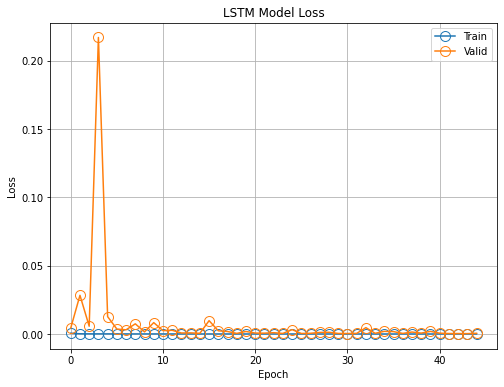

In [ ]:
plot_1(history1, 'Training / Validation Losses from History')

The provided code calls a function named `plot_1` with two arguments: `history1` and the string `'Training / Validation Losses from History'`. 

The `plot_1` function is responsible for plotting the loss values from the training and validation history of a model. By calling this function, it generates a plot that visualizes the trend of the training and validation losses over the course of training.

The plot will show the loss values on the y-axis, representing the measure of error between the predicted and actual values. The x-axis represents the epochs or iterations of training.

The purpose of this plot is to provide a visual representation of the model's performance in terms of its ability to minimize the loss. It allows for the examination of any patterns or trends in the loss values, which can help in understanding the model's learning progress and identifying potential issues like underfitting or overfitting.

In [ ]:
def evaluate_predictions(predictions, ytest, outliers):
    ratio = []
    differences = []
    for pred in range(len(ytest)):
        ratio.append((ytest[pred]/predictions[pred])-1)
        differences.append(abs(ytest[pred]- predictions[pred]))
    
    
    n_outliers = int(len(differences) * outliers)
    outliers = pd.Series(differences).astype(float).nlargest(n_outliers)
    
    return ratio, differences, outliers

The provided code defines a function named `evaluate_predictions` that takes three arguments: `predictions`, `ytest`, and `outliers`.

Inside the function, two empty lists named `ratio` and `differences` are initialized. 

A loop is then executed for each prediction in the range of the length of `ytest`. Within this loop, two calculations are performed:
1. The ratio between the actual test value `ytest[pred]` and the corresponding predicted value `predictions[pred]` is computed, and the result is appended to the `ratio` list. This ratio represents the relative difference between the actual and predicted values.
2. The absolute difference between the actual test value and the predicted value is computed using `abs(ytest[pred] - predictions[pred])`, and the result is appended to the `differences` list. This difference represents the magnitude of the error between the actual and predicted values.

Next, a variable `n_outliers` is calculated as the integer value of the length of `differences` multiplied by the `outliers` argument, which represents the proportion of outliers to consider.

Using the `nlargest()` function from the pandas library, the `outliers` list is populated with the top `n_outliers` largest values from the `differences` list.

Finally, the function returns three values: `ratio`, `differences`, and `outliers`, which can be used for further analysis or evaluation of the model's predictions.

In [ ]:
ratio, differences, outliers = evaluate_predictions(predictions, ytest, 0.01)

The provided code calls the `evaluate_predictions` function with the arguments `predictions`, `ytest`, and `0.01`. The function returns three values: `ratio`, `differences`, and `outliers`.

The returned `ratio` represents the relative difference between the actual test values and the corresponding predicted values. It is calculated by dividing each actual test value by the corresponding predicted value and subtracting 1.

The returned `differences` represent the absolute differences between the actual test values and the corresponding predicted values. They indicate the magnitude of the error between the actual and predicted values.

The returned `outliers` contain the largest differences between the actual and predicted values. The number of outliers is determined by multiplying the length of the `differences` list by 0.01 (which corresponds to 1% of the data). These outliers represent the largest errors or deviations between the actual and predicted values.

By assigning the returned values to the variables `ratio`, `differences`, and `outliers`, the code allows for further analysis or examination of the model's predictions and the associated errors.

In [ ]:
for index in outliers.index: 
    outliers[index] = predictions[index]
outliers

651    0.895588
649    0.908479
653    0.857305
650    0.903704
652    0.875325
654    0.834203
867    1.017309
734    0.902744
687    0.799588
dtype: float64

The provided code iterates over each index in the `outliers` variable. For each index, it assigns the corresponding value from the `predictions` list to the `outliers` list.

Essentially, this code updates the values in the `outliers` list with the corresponding predicted values. It replaces the original values in the `outliers` list, which were the absolute differences between the actual test values and the corresponding predicted values, with the predicted values themselves.

The resulting `outliers` list now contains the predicted values that were identified as outliers based on their large differences from the actual test values.

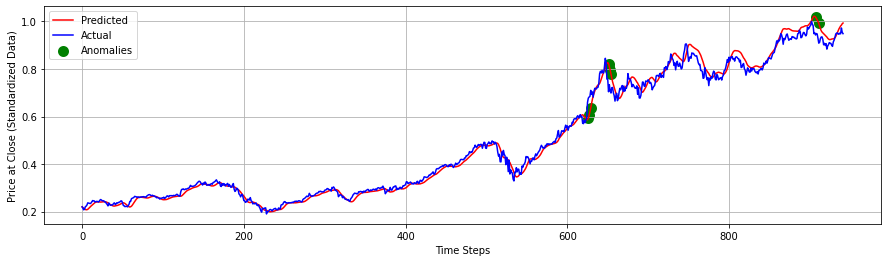

In [ ]:

# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

The provided code generates a plot to visualize the predicted values, actual values, and identified anomalies (outliers) in the data.

It creates a figure with a single subplot and sets the size of the figure. The predicted values are plotted in red using the `predictions` list, while the actual values are plotted in blue using the `ytest` list. The anomalies are represented as green markers at the corresponding indices on the plot using the `outliers` list.

The x-axis of the plot represents the time steps, indicating the order or sequence of the data points. The y-axis represents the price at the close of the stock, which is the target variable in this case.

The legend is added to the upper-left corner of the plot to indicate the meaning of the plotted lines and markers. The label "Predicted" is associated with the red line, "Actual" is associated with the blue line, and "Anomalies" is associated with the green markers.

By visualizing the predicted and actual values together with the identified anomalies, this plot helps to compare the model's performance and identify instances where the predictions deviate significantly from the actual values.

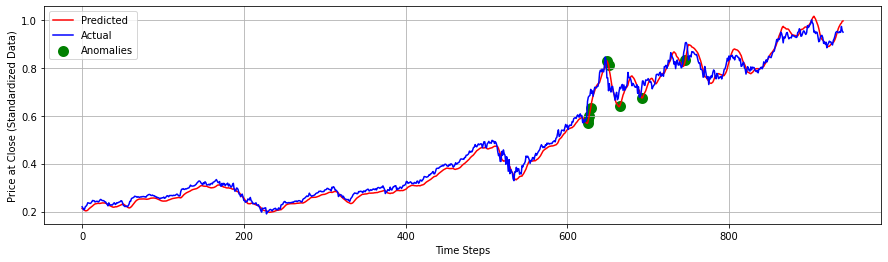

In [ ]:

# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

This code generates a plot to compare the predicted values with the actual values of a stock price. 

First, it creates a figure and sets its size using the `fig.set_figheight()` and `fig.set_figwidth()` functions. This determines the dimensions of the plot.

Then, it plots the predicted values as a red line using the `axs.plot()` function, with the `predictions` list as the data and 'Predicted' as the label. Similarly, it plots the actual values as a blue line using the `ytest` list as the data and 'Actual' as the label.

Next, it adds green markers on the plot to represent the anomalies, using the `axs.scatter()` function. The `outliers.index` provides the x-coordinates (time steps) where the anomalies occur, and the `outliers` list provides the corresponding y-coordinates (values). These markers help visualize where the anomalies are present.

The x-axis of the plot represents the time steps, indicating the order or sequence of the data points. The y-axis represents the price at the close of the stock, which is the target variable in this case.

The plot includes labels for the x-axis ('Time Steps') and y-axis ('Price at Close (Standardized Data)'). The legend, positioned in the upper left corner, indicates the meaning of the plotted lines and markers: 'Predicted' for the red line, 'Actual' for the blue line, and 'Anomalies' for the green markers.

By visualizing the predicted and actual values, along with the anomalies highlighted on the plot, one can assess the model's performance and detect any significant deviations or outliers in the predicted stock prices compared to the actual values.

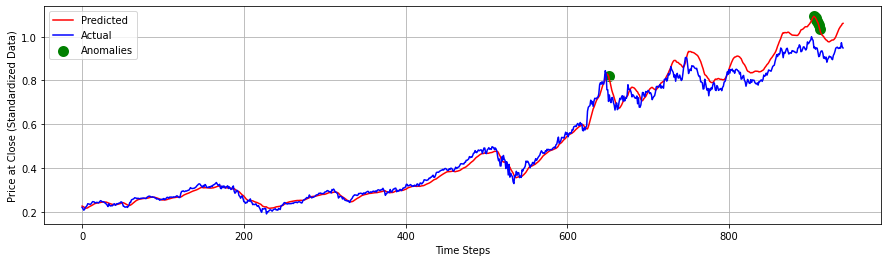

In [ ]:

# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

This code generates a plot that compares the predicted values with the actual values of a stock price. 

First, it creates a figure and sets its size to have a height of 4 units and a width of 15 units.

Then, it plots the predicted values as a red line using the `axs.plot()` function, with the `predictions` data as the y-coordinates and labels it as 'Predicted'. Similarly, it plots the actual values as a blue line using the `ytest` data and labels it as 'Actual'.

Next, it adds green markers on the plot to represent the anomalies. The `outliers.index` provides the x-coordinates (time steps) where the anomalies occur, and the `outliers` list provides the corresponding y-coordinates (values) for those time steps. These markers help visually identify the anomalies in the data.

The x-axis of the plot represents the time steps, indicating the sequence or order of the data points. The y-axis represents the price at the close of the stock, which is the target variable in this case. 

The plot includes labels for the x-axis ('Time Steps') and y-axis ('Price at Close (Standardized Data)'). The legend, positioned in the upper left corner, explains the meaning of the plotted lines and markers: 'Predicted' for the red line, 'Actual' for the blue line, and 'Anomalies' for the green markers.

By visualizing the predicted and actual values, along with the anomalies highlighted on the plot, one can assess the model's performance and visually inspect any significant deviations or anomalies in the predicted stock prices compared to the actual values.

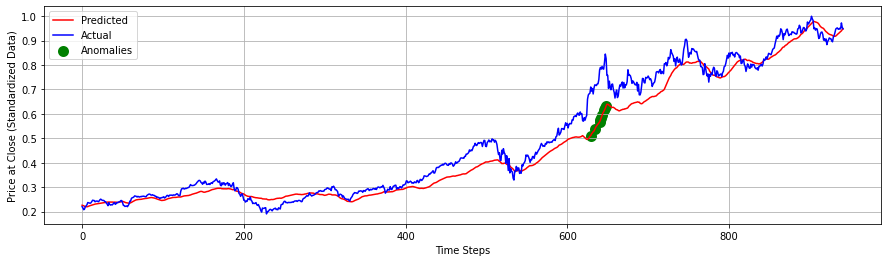

In [ ]:

# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

This code generates a plot that compares the predicted values with the actual values of a certain variable, likely representing stock prices.

The code first creates a figure object and assigns it to the variable `fig`. It sets the height of the figure to 4 units and the width to 15 units.

Then, it creates a set of axes within the figure and assigns it to the variable `axs`.

Next, it plots the predicted values as a red line using the `axs.plot()` function, with the `predictions` data as the y-coordinates. The label 'Predicted' is assigned to this line.

Similarly, it plots the actual values as a blue line using the `axs.plot()` function with the `ytest` data. The label 'Actual' is assigned to this line.

Additionally, it adds green markers to the plot using the `axs.scatter()` function. These markers represent anomalies or unusual data points. The x-coordinates of the markers are provided by the `outliers.index` data, while the y-coordinates are provided by the `outliers` data. The markers are labeled as 'Anomalies'.

The plot includes labels for the x-axis ('Time Steps') and y-axis ('Price at Close (Standardized Data)'). The legend is positioned in the upper left corner and provides an explanation of the plotted lines and markers.

Finally, the plot is displayed using `plt.show()`, allowing the user to view and analyze the predicted and actual values, as well as identify any anomalies or deviations in the data.

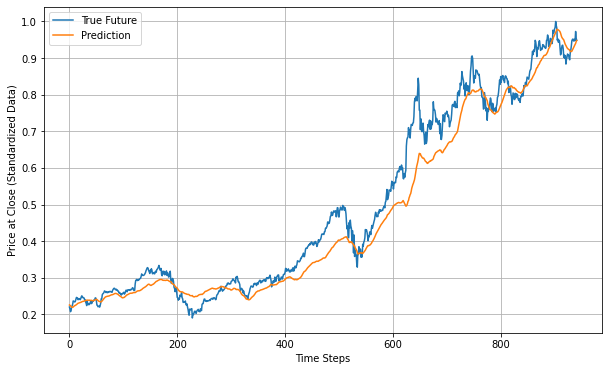

In [ ]:
# Plot true future vs prediction plot true future (test data) vs prediction the three models.
plt.figure(figsize=(10, 6))
range_future = len(predictions)
plt.plot(np.arange(range_future), np.array(ytest), 
             label='True Future')     
plt.plot(np.arange(range_future),np.array(predictions),
            label='Prediction')
plt.legend(loc='upper left')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.show()


This code generates a plot that compares the true future values (from the test data) with the predicted values from three different models.

The plot is created with a figure size of 10 units width and 6 units height using `plt.figure(figsize=(10, 6))`.

The x-axis represents the time steps and is labeled accordingly using `plt.xlabel('Time Steps')`.

The y-axis represents the price at close in standardized data and is labeled accordingly using `plt.ylabel('Price at Close (Standardized Data)')`.

Two lines are plotted on the graph using `plt.plot()`:

1. The true future values are plotted as a line with x-values ranging from 0 to the length of `predictions` and y-values from the test data (`ytest`). This line is labeled as 'True Future' using `label='True Future'`.
2. The predicted values from the models are plotted as a line with x-values ranging from 0 to the length of `predictions` and y-values from the `predictions` data. This line is labeled as 'Prediction' using `label='Prediction'`.

A legend is added to the plot using `plt.legend(loc='upper left')` to distinguish between the 'True Future' and 'Prediction' lines.

Finally, the plot is displayed using `plt.show()`, allowing the user to visually compare the true future values with the predicted values from the models.

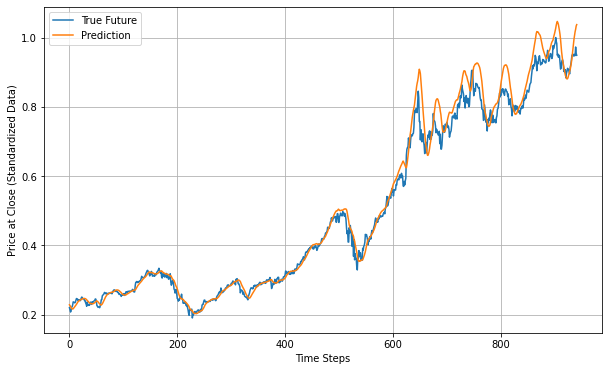

In [ ]:
# Plot true future vs prediction plot true future (test data) vs prediction the three models.
plt.figure(figsize=(10, 6))
range_future = len(predictions)
plt.plot(np.arange(range_future), np.array(ytest), 
             label='True Future')     
plt.plot(np.arange(range_future),np.array(predictions),
            label='Prediction')
plt.legend(loc='upper left')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.show()


This code generates a plot that compares the true future values (obtained from the test data) with the predicted values from three models. The plot is created with a figure size of 10 units width and 6 units height.

The x-axis of the plot represents the time steps, indicating the sequence of data points. It is labeled as "Time Steps" for clarity. The y-axis represents the price at close, but note that the data has been standardized. It is labeled as "Price at Close (Standardized Data)".

Two lines are plotted on the graph to visualize the comparison between the true future values and the predicted values:

1. The "True Future" line represents the actual values from the test data. It is plotted using the `np.array(ytest)` as the y-values and the `np.arange(range_future)` as the x-values. The range of the x-values corresponds to the length of the predictions. This line is labeled as "True Future" in the legend.

2. The "Prediction" line represents the predicted values from the models. It is plotted using the `np.array(predictions)` as the y-values and the same x-values as the "True Future" line. This line is labeled as "Prediction" in the legend.

A legend is added to the plot to differentiate between the "True Future" and "Prediction" lines. The legend is positioned in the upper-left corner of the plot.

Finally, the plot is displayed using `plt.show()`, allowing the user to visually compare the true future values with the predicted values from the models. This provides an intuitive representation of the performance and accuracy of the models in predicting the future values.